In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('DATA.csv')

In [4]:
df.head()

,Id,X,Y,twi2,asp2,tmaxjuly_2,tmax,soilmois,slope,ndvi,lulc,lake,evt_aug,elevation,road,river,pcp,index
0,1,-565155.8849,371574.0348,3,2,5,4,3,2,3,2,4,5,3,2,5,2,0
1,1,-490208.7562,371619.6100,4,2,4,4,3,2,3,2,3,4,3,1,5,2,1
2,1,-814589.1191,513177.4706,4,5,4,4,2,2,3,2,4,5,3,2,4,2,2
3,1,-467596.1093,454916.8753,2,2,5,4,3,2,3,2,3,4,3,1,4,2,3
4,1,-738400.4433,508255.4875,3,3,5,4,2,2,4,4,4,4,3,1,3,2,4


In [5]:
df['Id'].value_counts()

Id
1    6000
0    6000
Name: count, dtype: int64

In [6]:
df.shape

(12000, 18)

In [7]:
df = pd.read_csv('DATA.csv', names= ['Wildfire', 'X', 'Y', 'twi', 'aspect', 'temp_july', 'temp_max',
                                       'soilmois', 'slope', 'ndvi', 'lulc', 'dist_lake', 'evt_aug',
                                       'elevation', 'dist_road', 'dist_river', 'pcp', 'index'
                                                   ], header= 0
                      )

In [8]:
df.head()

,Wildfire,X,Y,twi,aspect,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp,index
0,1,-565155.8849,371574.0348,3,2,5,4,3,2,3,2,4,5,3,2,5,2,0
1,1,-490208.7562,371619.6100,4,2,4,4,3,2,3,2,3,4,3,1,5,2,1
2,1,-814589.1191,513177.4706,4,5,4,4,2,2,3,2,4,5,3,2,4,2,2
3,1,-467596.1093,454916.8753,2,2,5,4,3,2,3,2,3,4,3,1,4,2,3
4,1,-738400.4433,508255.4875,3,3,5,4,2,2,4,4,4,4,3,1,3,2,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Wildfire    12000 non-null  int64  
 1   X           12000 non-null  float64
 2   Y           12000 non-null  float64
 3   twi         12000 non-null  int64  
 4   aspect      12000 non-null  int64  
 5   temp_july   12000 non-null  int64  
 6   temp_max    12000 non-null  int64  
 7   soilmois    12000 non-null  int64  
 8   slope       12000 non-null  int64  
 9   ndvi        12000 non-null  int64  
 10  lulc        12000 non-null  int64  
 11  dist_lake   12000 non-null  int64  
 12  evt_aug     12000 non-null  int64  
 13  elevation   12000 non-null  int64  
 14  dist_road   12000 non-null  int64  
 15  dist_river  12000 non-null  int64  
 16  pcp         12000 non-null  int64  
 17  index       12000 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 1.6 MB


In [10]:
df = df.astype(
    {
        'Wildfire': 'category',
        'twi': 'category',
        'aspect': 'category',
        'temp_july': 'category',
        'temp_max': 'category',
        'soilmois': 'category',
        'slope': 'category',
        'ndvi': 'category',
        'lulc': 'category',
        'dist_lake': 'category',
        'evt_aug': 'category',
        'elevation': 'category',
        'dist_road': 'category',
        'dist_river': 'category',
        'pcp': 'category'
    }
)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Wildfire    12000 non-null  category
 1   X           12000 non-null  float64 
 2   Y           12000 non-null  float64 
 3   twi         12000 non-null  category
 4   aspect      12000 non-null  category
 5   temp_july   12000 non-null  category
 6   temp_max    12000 non-null  category
 7   soilmois    12000 non-null  category
 8   slope       12000 non-null  category
 9   ndvi        12000 non-null  category
 10  lulc        12000 non-null  category
 11  dist_lake   12000 non-null  category
 12  evt_aug     12000 non-null  category
 13  elevation   12000 non-null  category
 14  dist_road   12000 non-null  category
 15  dist_river  12000 non-null  category
 16  pcp         12000 non-null  category
 17  index       12000 non-null  int64   
dtypes: category(15), float64(2), int64(1)
memory u

In [12]:
df[df.isnull().any(axis= 1)]

,Wildfire,X,Y,twi,aspect,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp,index


In [13]:
new_order = [
             'index', 'X', 'Y', 'twi', 'aspect', 'temp_july', 'temp_max', 'soilmois', 'slope', 'ndvi',
             'lulc', 'dist_lake', 'evt_aug', 'elevation', 'dist_road', 'dist_river', 'pcp',  'Wildfire'
            ]
df = df[new_order]
df

,index,X,Y,twi,aspect,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp,Wildfire
0,0,-5.651559e+05,3.715740e+05,3,2,5,4,3,2,3,2,4,5,3,2,5,2,1
1,1,-4.902088e+05,3.716196e+05,4,2,4,4,3,2,3,2,3,4,3,1,5,2,1
2,2,-8.145891e+05,5.131775e+05,4,5,4,4,2,2,3,2,4,5,3,2,4,2,1
3,3,-4.675961e+05,4.549169e+05,2,2,5,4,3,2,3,2,3,4,3,1,4,2,1
4,4,-7.384004e+05,5.082555e+05,3,3,5,4,2,2,4,4,4,4,3,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,-1.680890e+06,2.620365e+06,1,2,3,2,1,4,3,4,5,2,3,3,3,1,0
11996,11996,-1.648350e+06,2.605284e+06,1,2,3,2,1,4,3,5,5,1,3,3,3,1,0
11997,11997,-1.621360e+06,2.652115e+06,5,2,2,2,1,4,3,3,5,1,3,3,4,1,0
11998,11998,-1.544370e+06,2.656084e+06,1,4,2,2,1,4,3,5,5,1,3,3,4,1,0


In [14]:
col_to_drop = ['index', 'X', 'Y', 'temp_max', 'evt_aug']
df = df.drop(columns= col_to_drop, axis= 1)

In [18]:
df.head(8)

,twi,aspect,temp_july,soilmois,slope,ndvi,lulc,dist_lake,elevation,dist_road,dist_river,pcp,Wildfire
0,3,2,5,3,2,3,2,4,3,2,5,2,1
1,4,2,4,3,2,3,2,3,3,1,5,2,1
2,4,5,4,2,2,3,2,4,3,2,4,2,1
3,2,2,5,3,2,3,2,3,3,1,4,2,1
4,3,3,5,2,2,4,4,4,3,1,3,2,1
5,4,3,4,1,2,3,2,4,3,2,3,2,1
6,3,4,5,2,2,3,2,4,3,1,3,2,1
7,2,3,5,2,2,3,2,4,3,1,3,2,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   twi         12000 non-null  category
 1   aspect      12000 non-null  category
 2   temp_july   12000 non-null  category
 3   soilmois    12000 non-null  category
 4   slope       12000 non-null  category
 5   ndvi        12000 non-null  category
 6   lulc        12000 non-null  category
 7   dist_lake   12000 non-null  category
 8   elevation   12000 non-null  category
 9   dist_road   12000 non-null  category
 10  dist_river  12000 non-null  category
 11  pcp         12000 non-null  category
 12  Wildfire    12000 non-null  category
dtypes: category(13)
memory usage: 155.3 KB


# Multi Collinearity Analysis (VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(df, exclude_columns=None):
    # Set default for exclude_columns if not provided
    if exclude_columns is None:
        exclude_columns = []

    # Always exclude 'X', 'Y', and 'index' in addition to other specified columns
    always_exclude = ['index', 'Wildfire']
    all_exclusions = set(exclude_columns).union(always_exclude)

    # Drop excluded columns
    df_filtered = df.drop(columns=all_exclusions, errors='ignore')  # 'errors=ignore' prevents errors if the column doesn't exist

    # Calculate VIF for each variable that remains
    vifs = [variance_inflation_factor(df_filtered.values, i) for i in range(df_filtered.shape[1])]
    tolerance = [1/vif for vif in vifs]

    # Prepare the VIF DataFrame
    vif_data = pd.DataFrame({
        'VIF': vifs,
        'Tolerance': tolerance
    }, index=df_filtered.columns)

    return vif_data

# Specify additional columns to exclude as needed
additional_excludes = ['index', 'Wildfire']  # Add any other columns you wish to exclude

# Calculate VIF excluding specified columns along with 'X', 'Y', and 'index'
vif_data = calculate_vif(df, exclude_columns=additional_excludes)

print(vif_data)


                  VIF  Tolerance
twi          5.756243   0.173724
aspect       8.780202   0.113893
temp_july    9.788640   0.102159
soilmois     8.252890   0.121170
slope       14.295547   0.069952
ndvi        13.004968   0.076894
lulc         6.627162   0.150894
dist_lake   15.846927   0.063104
elevation   11.877394   0.084194
dist_road    8.331147   0.120031
dist_river  19.836695   0.050412
pcp          9.195910   0.108744


<ipython-input-16-973c6bce1dee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vif_data['VIF'], y=vif_data.index, palette="vlag", ax=ax)


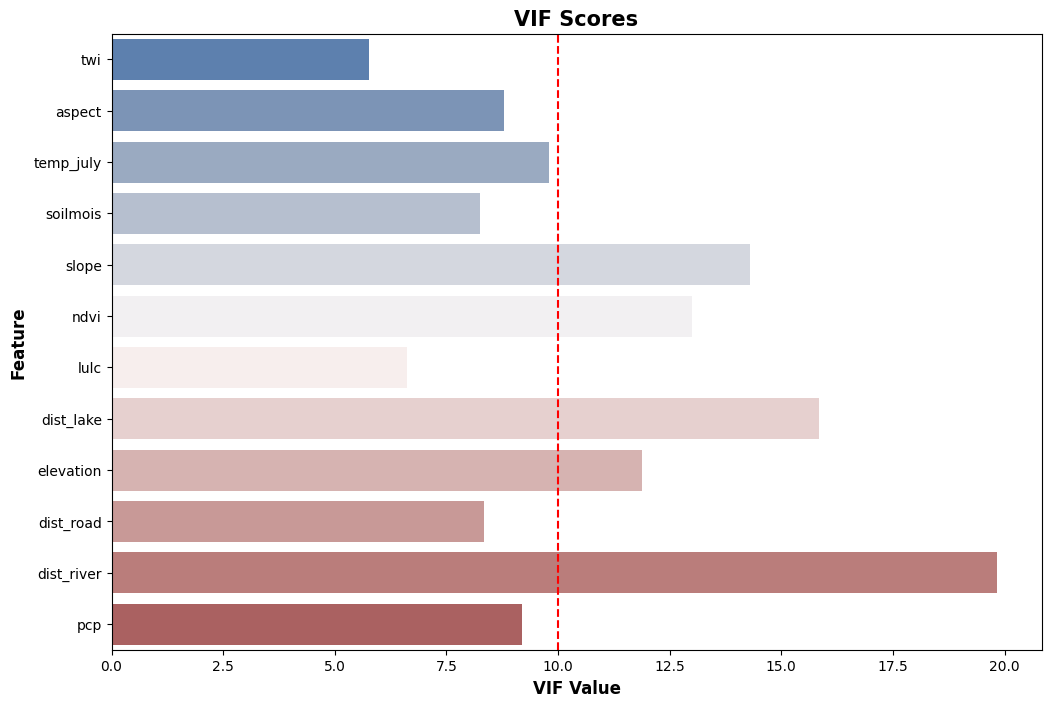

In [ ]:
def plot_vif(vif_data):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 8))

    # Plot the VIF values
    sns.barplot(x=vif_data['VIF'], y=vif_data.index, palette="vlag", ax=ax)
    ax.axvline(x=10, color="red", linestyle="--")  # Add a vertical line at VIF = 30
    ax.set_title('VIF Scores', fontweight='bold', fontsize=15)
    ax.set_xlabel('VIF Value', fontweight='bold', fontsize=12)
    ax.set_ylabel('Feature', fontweight='bold', fontsize=12)

    # Display the plot
    plt.show()

plot_vif(vif_data)

# Feature Importance using Random forest classifier

In [19]:
df.columns

Index(['twi', 'aspect', 'temp_july', 'soilmois', 'slope', 'ndvi', 'lulc',
       'dist_lake', 'elevation', 'dist_road', 'dist_river', 'pcp', 'Wildfire'],
      dtype='object')

In [20]:
from sklearn.ensemble import RandomForestClassifier
# Create the feature matrix X and the target variable y

X = df[
    ['twi', 'aspect', 'temp_july', 'soilmois', 'slope', 'ndvi', 'lulc',
     'dist_lake', 'elevation', 'dist_road', 'dist_river', 'pcp']
]
y = df['Wildfire']

# Initialize the random forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Calculate the sum of importances
total_importance = feature_importance['Importance'].sum()

# Calculate the weights by dividing each importance by the total importance
feature_importance['Weight'] = feature_importance['Importance'] / total_importance

# Sort the DataFrame by importance in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Print the feature importances with weights
print(feature_importance)


       Feature  Importance    Weight
5         ndvi    0.193700  0.193700
6         lulc    0.168272  0.168272
2    temp_july    0.123905  0.123905
9    dist_road    0.111756  0.111756
11         pcp    0.091627  0.091627
3     soilmois    0.066257  0.066257
8    elevation    0.065086  0.065086
7    dist_lake    0.053932  0.053932
10  dist_river    0.039250  0.039250
4        slope    0.032841  0.032841
1       aspect    0.031097  0.031097
0          twi    0.022279  0.022279


In [ ]:
import pandas as pd

# Assuming the data you provided is stored in the following DataFrame
data = {
    'Feature': ['ndvi', 'lulc', 'temp_july', 'dist_road', 'pcp', 'elevation', 'soilmois', 'dist_lake', 'dist_river', 'aspect', 'slope', 'twi'],
    'Importance': [0.1819, 0.1654, 0.1376, 0.1136, 0.0959, 0.0659, 0.0635, 0.0516, 0.0394, 0.0329, 0.0182, 0.0235],
    'Weight': [0.1819, 0.1654, 0.1376, 0.1136, 0.0959, 0.0659, 0.0635, 0.0516, 0.0394, 0.0329, 0.0182, 0.0235]
}

# Create a DataFrame
feature_importance_df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
file_path = 'RFC_feature_importance.csv'
feature_importance_df.to_csv(file_path, index=False)

file_path


'RFC_feature_importance.csv'

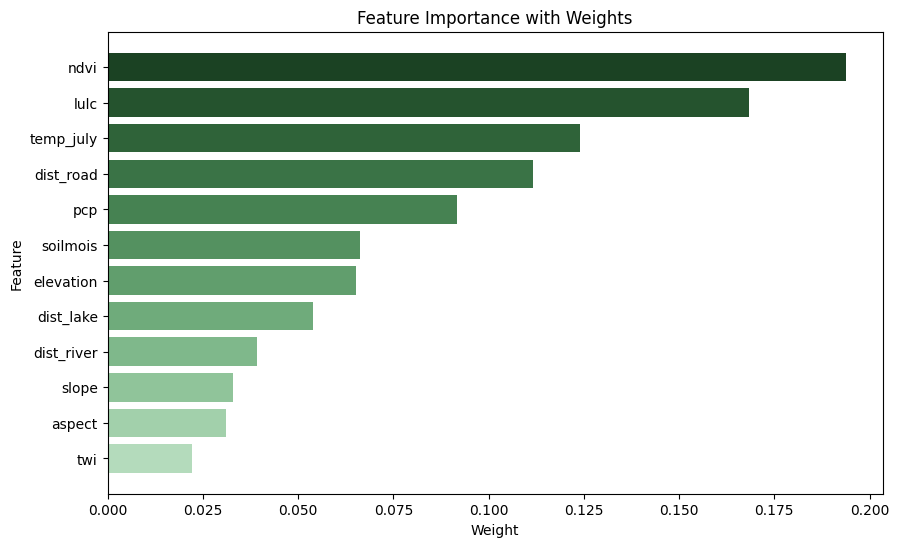

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns



# Set the color palette
palette = sns.cubehelix_palette(len(feature_importance['Feature']), start=2, rot=0, dark=0.2, light=0.8, reverse=True)

# Create a graph
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Weight'], color=palette)
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Importance with Weights')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

# Show the graph
plt.show()

## Featuer Importance using permutation feature importance

<ipython-input-22-a888dc4e3824>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='viridis')


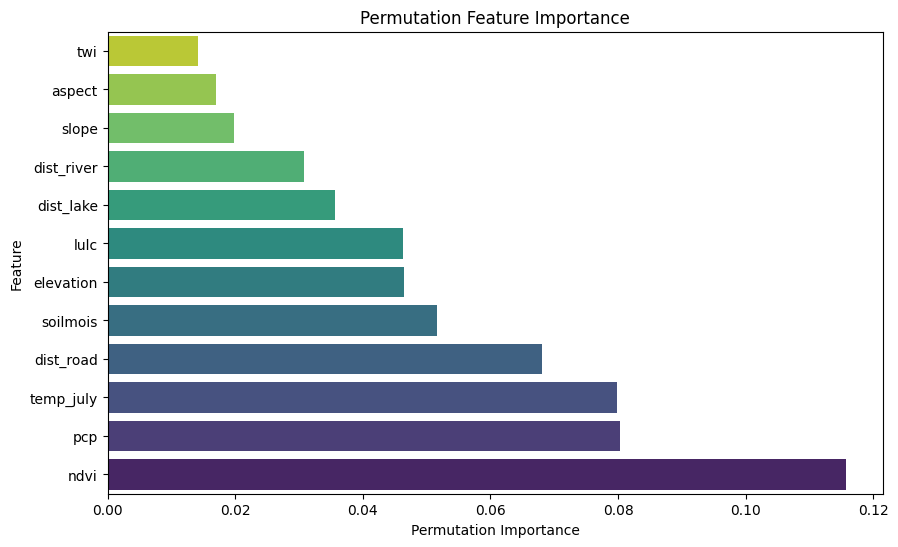

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the features and target variable
X = df[
    ['twi', 'aspect', 'temp_july', 'soilmois', 'slope', 'ndvi', 'lulc',
     'dist_lake', 'elevation', 'dist_road', 'dist_river', 'pcp']
]
y = df['Wildfire']

# Initialize and train the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Compute permutation feature importance
perm_importance = permutation_importance(rf, X, y, n_repeats=10, random_state=42)

# Get the feature names
feature_names = X.columns

# Create a DataFrame for visualization
perm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
})

# Sort the DataFrame by importance
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plot permutation feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='viridis')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()
plt.show()


# Feature Selection using RFE

Feature Rankings:
       Feature  Ranking  Selected
1       aspect        1      True
2    temp_july        1      True
3     soilmois        1      True
4        slope        1      True
5         ndvi        1      True
6         lulc        1      True
7    dist_lake        1      True
8    elevation        1      True
9    dist_road        1      True
10  dist_river        1      True
11         pcp        1      True
0          twi        2     False
Least Important Feature to be removed: twi
DataFrame after removing the least important feature:
  aspect temp_july soilmois slope ndvi lulc dist_lake elevation dist_road  \
0      2         5        3     2    3    2         4         3         2   
1      2         4        3     2    3    2         3         3         1   
2      5         4        2     2    3    2         4         3         2   
3      2         5        3     2    3    2         3         3         1   
4      3         5        2     2    4    4         4     

<ipython-input-23-3263819583be>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ranking', y='Feature', data=feature_ranking, palette='viridis')


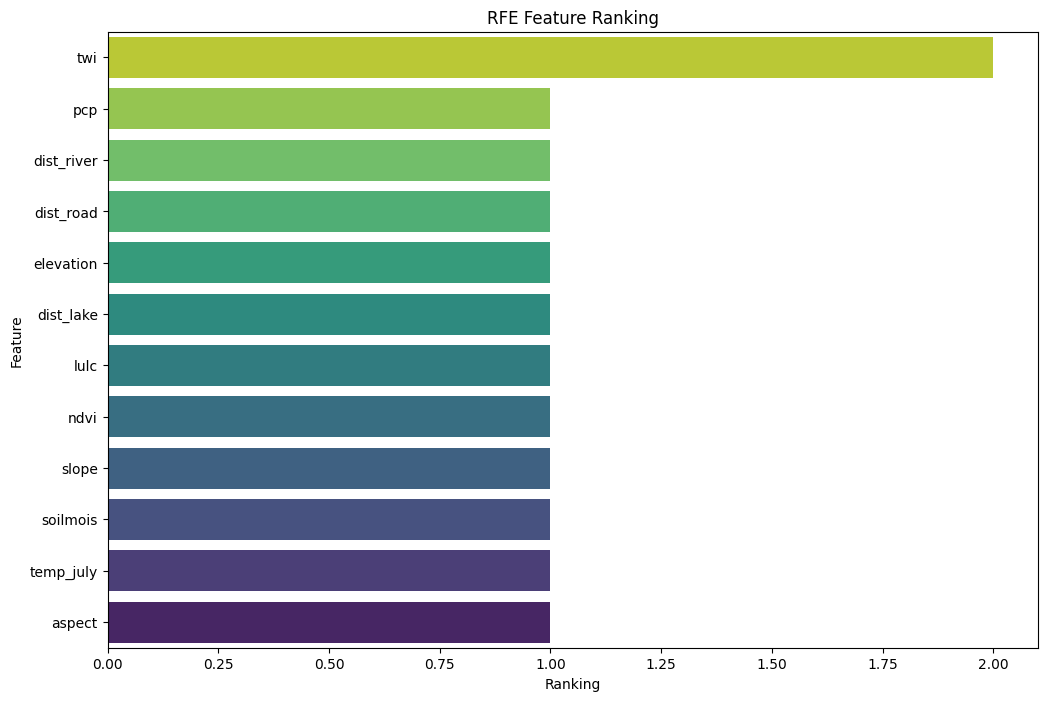

In [23]:
from sklearn.feature_selection import RFE

# Initialize RFE with the random forest classifier, specifying the number of features you want to select
n_features_to_select = X.shape[1] - 1  # One less than the total number of features
rfe = RFE(estimator=rf, n_features_to_select=n_features_to_select, step=1)

# Fit RFE
rfe.fit(X, y)

# Create a DataFrame to display feature names and their corresponding rankings
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_  # This will be True for selected features and False otherwise
})

# Sort DataFrame by ranking
feature_ranking = feature_ranking.sort_values('Ranking')

print("Feature Rankings:")
print(feature_ranking)

# Identify the least important feature (with the highest rank)
least_important_feature = feature_ranking[feature_ranking['Ranking'] == feature_ranking['Ranking'].max()]['Feature'].values[0]
print(f'Least Important Feature to be removed: {least_important_feature}')

# Drop the least important feature from the DataFrame
df = df.drop(columns=[least_important_feature])

print(f'DataFrame after removing the least important feature:\n{df.head()}')

# Visualize the feature rankings
plt.figure(figsize=(12, 8))
sns.barplot(x='Ranking', y='Feature', data=feature_ranking, palette='viridis')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.title('RFE Feature Ranking')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
df.columns

Index(['aspect', 'temp_july', 'soilmois', 'slope', 'ndvi', 'lulc', 'dist_lake',
       'elevation', 'dist_road', 'dist_river', 'pcp', 'Wildfire'],
      dtype='object')

# Split data into Train and Test and Encoding categorical features

In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

categorical_columns = [
    'aspect', 'temp_july', 'soilmois', 'slope', 'ndvi', 'lulc',
    'dist_lake', 'elevation', 'dist_road', 'dist_river', 'pcp'
]

# Prepare the features and target variable without dropping any columns
X = df.drop(['Wildfire'], axis=1)
y = df['Wildfire']

# Split data into training and remaining sets (temporary set for further split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42                     )

# Split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit the encoder on training data and transform the training, validation, and test data for categorical columns
encoder.fit(X_train[categorical_columns])
encoded_train = encoder.transform(X_train[categorical_columns])
encoded_val = encoder.transform(X_val[categorical_columns])
encoded_test = encoder.transform(X_test[categorical_columns])

# Convert the encoded features into a DataFrame
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_columns))
encoded_val_df = pd.DataFrame(encoded_val, columns=encoder.get_feature_names_out(categorical_columns))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded features with the non-categorical data
final_train_df = pd.concat([X_train.drop(categorical_columns, axis=1).reset_index(drop=True), encoded_train_df], axis=1)
final_val_df = pd.concat([X_val.drop(categorical_columns, axis=1).reset_index(drop=True), encoded_val_df], axis=1)
final_test_df = pd.concat([X_test.drop(categorical_columns, axis=1).reset_index(drop=True), encoded_test_df], axis=1)

# Add the target variable 'Wildfire' back to the final datasets
final_train_df['Wildfire'] = y_train.reset_index(drop=True)
final_val_df['Wildfire'] = y_val.reset_index(drop=True)
final_test_df['Wildfire'] = y_test.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Machine Learning algorithms

In [26]:
final_train_df.shape

(8400, 60)

In [27]:
final_val_df.shape

(1800, 60)

In [28]:
final_test_df.shape

(1800, 60)

## ANN

Epoch 1/5
263/263 [==============================] - 2s 4ms/step - loss: 0.6848 - accuracy: 0.5395 - val_loss: 0.6205 - val_accuracy: 0.7706
Epoch 2/5
263/263 [==============================] - 1s 3ms/step - loss: 0.5919 - accuracy: 0.7287 - val_loss: 0.4721 - val_accuracy: 0.9078
Epoch 3/5
263/263 [==============================] - 1s 2ms/step - loss: 0.5430 - accuracy: 0.7768 - val_loss: 0.4235 - val_accuracy: 0.9172
Epoch 4/5
263/263 [==============================] - 1s 3ms/step - loss: 0.5274 - accuracy: 0.7862 - val_loss: 0.4004 - val_accuracy: 0.9200
Epoch 5/5
57/57 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.9172
Test Loss: 0.38148197531700134
Test Accuracy: 0.9172222018241882
57/57 [==============================] - 0s 1ms/step


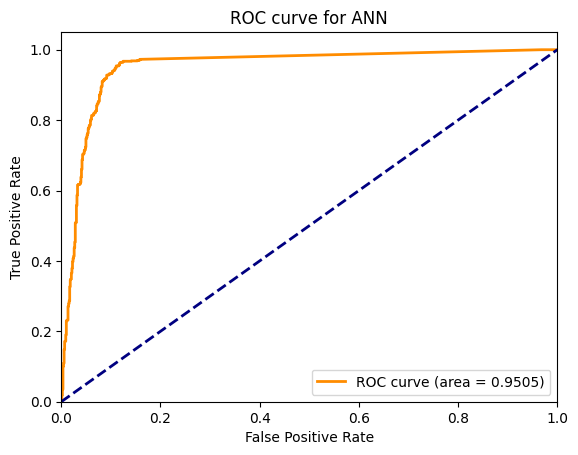

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the ANN model
def create_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(8, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Create the model
input_dim = final_train_df.shape[1] - 1  # Exclude the target variable 'Wildfire'
model = create_ann_model(input_dim)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Separate features and target variables for training and validation sets
X_train = final_train_df.drop('Wildfire', axis=1)
y_train = final_train_df['Wildfire']
X_val = final_val_df.drop('Wildfire', axis=1)
y_val = final_val_df['Wildfire']

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
X_test = final_test_df.drop('Wildfire', axis=1)
y_test = final_test_df['Wildfire']
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities for the test set
y_test_pred_prob = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for ANN')
plt.legend(loc='lower right')
plt.show()


# CNN

Epoch 1/5
263/263 [==============================] - 2s 4ms/step - loss: 0.6168 - accuracy: 0.6639 - val_loss: 0.4420 - val_accuracy: 0.8533
Epoch 2/5
263/263 [==============================] - 1s 4ms/step - loss: 0.4737 - accuracy: 0.7774 - val_loss: 0.3491 - val_accuracy: 0.8794
Epoch 3/5
263/263 [==============================] - 1s 4ms/step - loss: 0.4245 - accuracy: 0.8161 - val_loss: 0.3241 - val_accuracy: 0.8811
Epoch 4/5
263/263 [==============================] - 1s 4ms/step - loss: 0.4176 - accuracy: 0.8204 - val_loss: 0.3146 - val_accuracy: 0.8839
Epoch 5/5
57/57 [==============================] - 0s 2ms/step


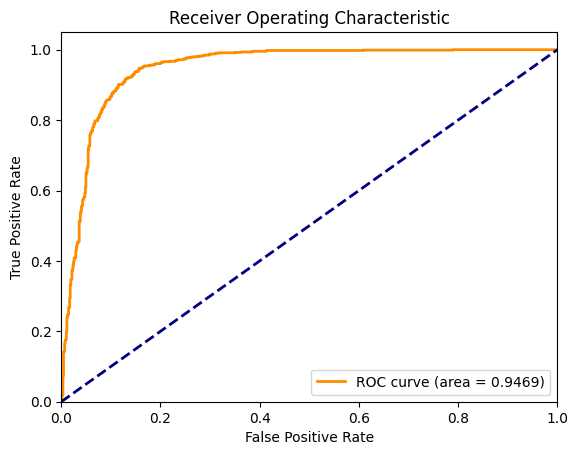

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the CNN model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),
        Conv1D(filters=8, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),
        Flatten(),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Assuming 'input_shape' is known and appropriate for a CNN
input_shape = (final_train_df.shape[1] - 1, 1)  # Exclude the target variable 'Wildfire'

# Prepare data
# Convert categorical target data to numpy arrays
y_train = np.array(final_train_df['Wildfire']).astype('float32')
y_val = np.array(final_val_df['Wildfire']).astype('float32')
y_test = np.array(final_test_df['Wildfire']).astype('float32')

# Reshape input data for CNN input
X_train = final_train_df.drop('Wildfire', axis=1).values.reshape(-1, input_shape[0], 1)
X_val = final_val_df.drop('Wildfire', axis=1).values.reshape(-1, input_shape[0], 1)
X_test = final_test_df.drop('Wildfire', axis=1).values.reshape(-1, input_shape[0], 1)

# Create and compile the CNN model
model = create_cnn_model(input_shape)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
model.evaluate(X_test, y_test)

# Predict probabilities for ROC curve
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# BiLSTM

Epoch 1/5
263/263 [==============================] - 12s 12ms/step - loss: 0.5548 - accuracy: 0.7510 - val_loss: 0.2894 - val_accuracy: 0.9139
Epoch 2/5
263/263 [==============================] - 2s 6ms/step - loss: 0.3017 - accuracy: 0.9025 - val_loss: 0.2290 - val_accuracy: 0.9267
Epoch 3/5
263/263 [==============================] - 2s 6ms/step - loss: 0.2724 - accuracy: 0.9132 - val_loss: 0.2197 - val_accuracy: 0.9261
Epoch 4/5
263/263 [==============================] - 3s 11ms/step - loss: 0.2675 - accuracy: 0.9112 - val_loss: 0.2126 - val_accuracy: 0.9283
Epoch 5/5
57/57 [==============================] - 2s 2ms/step


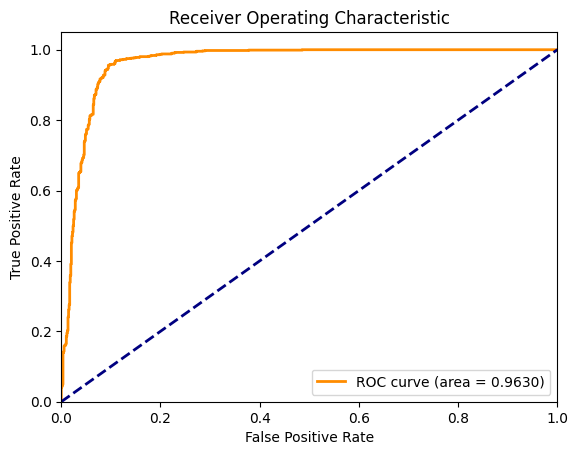

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the BiLSTM model
def create_bilstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(8, return_sequences=True), input_shape=input_shape),
        Dropout(0.5),
        Bidirectional(LSTM(4)),
        Dropout(0.5),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
    ])
    return model

# Assuming input_shape based on the final_train_df without the target column
input_shape = (1, final_train_df.shape[1] - 1)  # Only one timestep, features equal to number of columns minus target

# Create the model
model = create_bilstm_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Convert target data to float32 to avoid TypeError
y_train = final_train_df['Wildfire'].astype('float32').values
y_val = final_val_df['Wildfire'].astype('float32').values
y_test = final_test_df['Wildfire'].astype('float32').values

# Reshape data to fit the BiLSTM input requirements: [samples, timesteps, features]
X_train = final_train_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_train_df.shape[1] - 1)
X_val = final_val_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_val_df.shape[1] - 1)
X_test = final_test_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_test_df.shape[1] - 1)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Predict probabilities for ROC curve
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# LSTM

Epoch 1/5
263/263 [==============================] - 7s 9ms/step - loss: 0.6103 - accuracy: 0.6658 - val_loss: 0.3874 - val_accuracy: 0.9139
Epoch 2/5
263/263 [==============================] - 2s 8ms/step - loss: 0.3760 - accuracy: 0.8676 - val_loss: 0.2383 - val_accuracy: 0.9244
Epoch 3/5
263/263 [==============================] - 1s 5ms/step - loss: 0.3210 - accuracy: 0.8783 - val_loss: 0.2255 - val_accuracy: 0.9256
Epoch 4/5
263/263 [==============================] - 1s 5ms/step - loss: 0.3102 - accuracy: 0.8768 - val_loss: 0.2198 - val_accuracy: 0.9239
Epoch 5/5
57/57 [==============================] - 1s 2ms/step


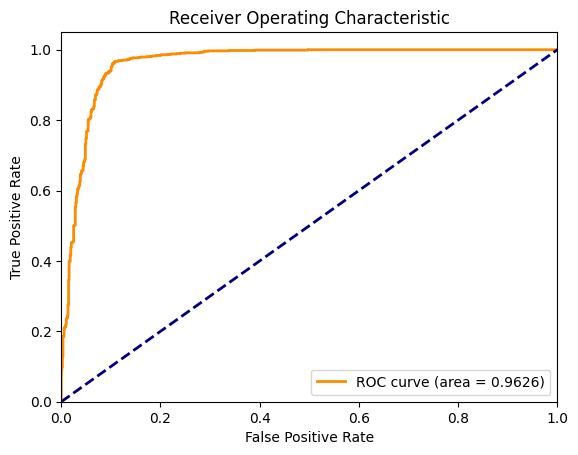

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(8, return_sequences=True, input_shape=input_shape),
        Dropout(0.5),
        LSTM(4, return_sequences=False),  # Remove return_sequences if you only want the last output
        Dropout(0.5),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
    ])
    return model

# Assuming input_shape based on the final_train_df without the target column
input_shape = (1, final_train_df.shape[1] - 1)  # Only one timestep, features equal to number of columns minus target

# Create the model
model = create_lstm_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Convert target data to float32 to avoid TypeError
y_train = final_train_df['Wildfire'].astype('float32').values
y_val = final_val_df['Wildfire'].astype('float32').values
y_test = final_test_df['Wildfire'].astype('float32').values

# Reshape data to fit the LSTM input requirements: [samples, timesteps, features]
X_train = final_train_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_train_df.shape[1] - 1)
X_val = final_val_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_val_df.shape[1] - 1)
X_test = final_test_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_test_df.shape[1] - 1)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Predict probabilities for ROC curve
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# RNN

Epoch 1/5
263/263 [==============================] - 4s 5ms/step - loss: 0.5879 - accuracy: 0.7004 - val_loss: 0.3771 - val_accuracy: 0.9056
Epoch 2/5
263/263 [==============================] - 1s 5ms/step - loss: 0.4148 - accuracy: 0.8233 - val_loss: 0.2638 - val_accuracy: 0.9183
Epoch 3/5
263/263 [==============================] - 2s 6ms/step - loss: 0.3640 - accuracy: 0.8542 - val_loss: 0.2391 - val_accuracy: 0.9228
Epoch 4/5
263/263 [==============================] - 1s 5ms/step - loss: 0.3263 - accuracy: 0.8744 - val_loss: 0.2307 - val_accuracy: 0.9261
Epoch 5/5
57/57 [==============================] - 0s 2ms/step


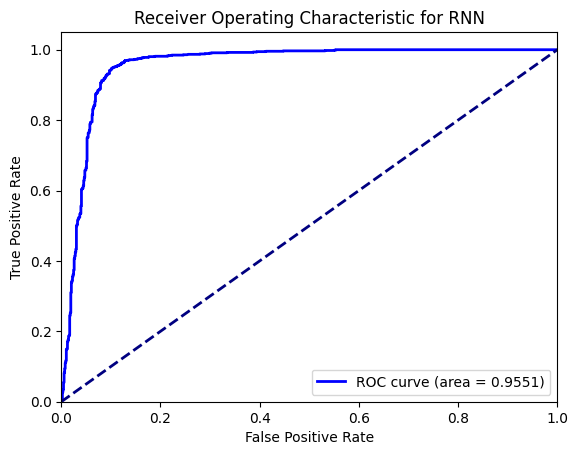

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the RNN model
def create_rnn_model(input_shape):
    model = Sequential([
        SimpleRNN(8, return_sequences=True, input_shape=input_shape),
        Dropout(0.5),
        SimpleRNN(4, return_sequences=False),  # Only return the final output
        Dropout(0.5),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
    ])
    return model

# Assuming input_shape based on the final_train_df without the target column
input_shape = (1, final_train_df.shape[1] - 1)  # Only one timestep, features equal to number of columns minus target

# Create the model
model = create_rnn_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Convert target data to float32 to avoid TypeError
y_train = final_train_df['Wildfire'].astype('float32').values
y_val = final_val_df['Wildfire'].astype('float32').values
y_test = final_test_df['Wildfire'].astype('float32').values

# Reshape data to fit the RNN input requirements: [samples, timesteps, features]
X_train = final_train_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_train_df.shape[1] - 1)
X_val = final_val_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_val_df.shape[1] - 1)
X_test = final_test_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_test_df.shape[1] - 1)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Predict probabilities for ROC curve
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN')
plt.legend(loc="lower right")
plt.show()


# BiRNN

Epoch 1/5
263/263 [==============================] - 7s 11ms/step - loss: 0.5367 - accuracy: 0.7369 - val_loss: 0.2886 - val_accuracy: 0.9028
Epoch 2/5
263/263 [==============================] - 1s 5ms/step - loss: 0.3292 - accuracy: 0.8806 - val_loss: 0.2352 - val_accuracy: 0.9217
Epoch 3/5
263/263 [==============================] - 1s 5ms/step - loss: 0.2963 - accuracy: 0.8946 - val_loss: 0.2270 - val_accuracy: 0.9239
Epoch 4/5
263/263 [==============================] - 1s 5ms/step - loss: 0.2787 - accuracy: 0.9048 - val_loss: 0.2255 - val_accuracy: 0.9256
Epoch 5/5
57/57 [==============================] - 0s 3ms/step - loss: 0.2290 - accuracy: 0.9222
Test Loss: 0.22900159657001495
Test Accuracy: 0.9222221970558167
57/57 [==============================] - 1s 2ms/step


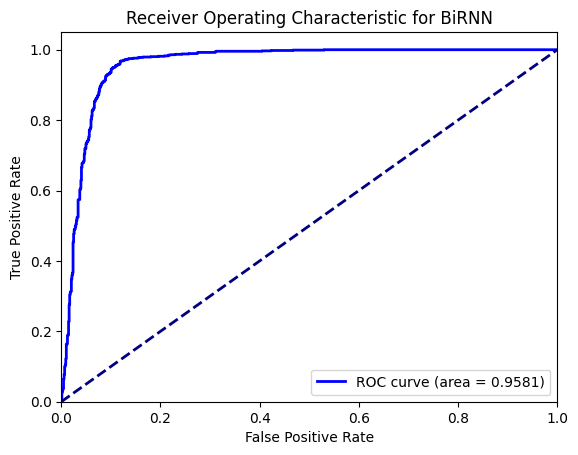

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the BiRNN model
def create_birnn_model(input_shape):
    model = Sequential([
        Bidirectional(SimpleRNN(8, return_sequences=True), input_shape=input_shape),
        Dropout(0.5),
        Bidirectional(SimpleRNN(4, return_sequences=False)),  # Only return the final output
        Dropout(0.5),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
    ])
    return model

# Assuming input_shape based on the final_train_df without the target column
input_shape = (1, final_train_df.shape[1] - 1)  # Only one timestep, features equal to number of columns minus target

# Create the model
model = create_birnn_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Convert target data to float32 to avoid TypeError
y_train = final_train_df['Wildfire'].astype('float32').values
y_val = final_val_df['Wildfire'].astype('float32').values
y_test = final_test_df['Wildfire'].astype('float32').values

# Reshape data to fit the RNN input requirements: [samples, timesteps, features]
X_train = final_train_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_train_df.shape[1] - 1)
X_val = final_val_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_val_df.shape[1] - 1)
X_test = final_test_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_test_df.shape[1] - 1)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities for ROC curve
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for BiRNN')
plt.legend(loc="lower right")
plt.show()


# create a single block of code to generate ROC curves for the four models (BiLSTM, LSTM, RNN, BiRNN)

Epoch 1/5
263/263 [==============================] - 8s 9ms/step - loss: 0.6824 - accuracy: 0.5826 - val_loss: 0.6240 - val_accuracy: 0.8200
Epoch 2/5
263/263 [==============================] - 1s 5ms/step - loss: 0.5879 - accuracy: 0.7371 - val_loss: 0.4673 - val_accuracy: 0.9144
Epoch 3/5
263/263 [==============================] - 1s 5ms/step - loss: 0.5240 - accuracy: 0.7767 - val_loss: 0.4073 - val_accuracy: 0.9172
Epoch 4/5
263/263 [==============================] - 1s 5ms/step - loss: 0.5013 - accuracy: 0.7811 - val_loss: 0.3752 - val_accuracy: 0.9183
Epoch 5/5
57/57 [==============================] - 1s 2ms/step
Epoch 1/5
263/263 [==============================] - 11s 12ms/step - loss: 0.6558 - accuracy: 0.6357 - val_loss: 0.4964 - val_accuracy: 0.8961
Epoch 2/5
263/263 [==============================] - 2s 7ms/step - loss: 0.4189 - accuracy: 0.8615 - val_loss: 0.2651 - val_accuracy: 0.9228
Epoch 3/5
263/263 [==============================] - 3s 11ms/step - loss: 0.3400 - accura

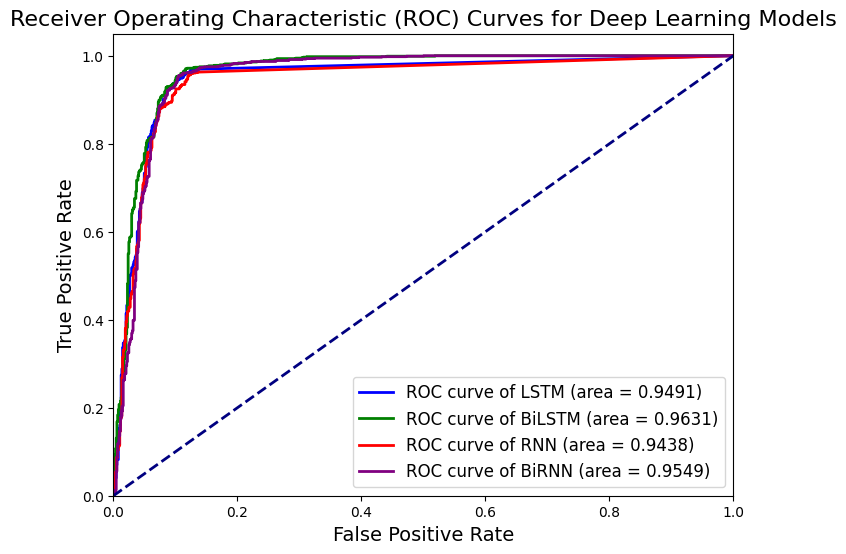

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the function to create models
def create_model(model_type, input_shape):
    if model_type == 'BiLSTM':
        model = Sequential([
            Bidirectional(LSTM(4, return_sequences=True), input_shape=input_shape),
            Dropout(0.5),
            Bidirectional(LSTM(2)),
            Dropout(0.5),
            Dense(2, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    elif model_type == 'LSTM':
        model = Sequential([
            LSTM(4, return_sequences=True, input_shape=input_shape),
            Dropout(0.5),
            LSTM(2, return_sequences=False),
            Dropout(0.5),
            Dense(2, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    elif model_type == 'RNN':
        model = Sequential([
            SimpleRNN(4, return_sequences=True, input_shape=input_shape),
            Dropout(0.5),
            SimpleRNN(2, return_sequences=False),
            Dropout(0.5),
            Dense(2, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    elif model_type == 'BiRNN':
        model = Sequential([
            Bidirectional(SimpleRNN(4, return_sequences=True), input_shape=input_shape),
            Dropout(0.5),
            Bidirectional(SimpleRNN(2, return_sequences=False)),
            Dropout(0.5),
            Dense(2, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    return model

# Assuming input_shape based on the final_train_df without the target column
input_shape = (1, final_train_df.shape[1] - 1)  # Only one timestep, features equal to number of columns minus target

# Initialize dictionary to store FPR, TPR, and AUC for each model
roc_data = {}

# Define model types
model_types = ['LSTM', 'BiLSTM', 'RNN', 'BiRNN']

# Train and evaluate each model
for model_type in model_types:
    model = create_model(model_type, input_shape)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    y_train = final_train_df['Wildfire'].astype('float32').values
    y_val = final_val_df['Wildfire'].astype('float32').values
    y_test = final_test_df['Wildfire'].astype('float32').values

    X_train = final_train_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_train_df.shape[1] - 1)
    X_val = final_val_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_val_df.shape[1] - 1)
    X_test = final_test_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_test_df.shape[1] - 1)

    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))
    y_pred_probs = model.predict(X_test).ravel()

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    roc_data[model_type] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

# Colors for different models
colors = ['blue', 'green', 'red', 'purple']

# Initialize the plot
plt.figure(figsize=(8, 6))

# Plot ROC curves for each model
for (model_type, color) in zip(roc_data.keys(), colors):
    plt.plot(roc_data[model_type]['fpr'], roc_data[model_type]['tpr'], color=color, lw=2,
             label=f'ROC curve of {model_type} (area = {roc_data[model_type]["auc"]:.4f})')

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curves for Deep Learning Models', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

# Display the plot
plt.show()


# Confusion matrix

In [36]:
# Define model types
model_types = ['LSTM', 'BiLSTM', 'RNN', 'BiRNN']

# Train and evaluate each model
for model_type in model_types:
    model = create_model(model_type, input_shape)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    y_train = final_train_df['Wildfire'].astype('float32').values
    y_val = final_val_df['Wildfire'].astype('float32').values
    y_test = final_test_df['Wildfire'].astype('float32').values

    X_train = final_train_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_train_df.shape[1] - 1)
    X_val = final_val_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_val_df.shape[1] - 1)
    X_test = final_test_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_test_df.shape[1] - 1)

    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))
    y_pred_probs = model.predict(X_test).ravel()

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    roc_data[model_type] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

    # Calculate metrics
    y_pred = (y_pred_probs >= 0.5).astype(int)  # Convert probabilities to binary predictions
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Sensitivity
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    metrics_data[model_type] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Sensitivity': recall,
        'Specificity': specificity,
        'F1 Score': f1
    }

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_data).transpose()

# Display the DataFrame in a research paper format
print(metrics_df)

Epoch 1/5
263/263 [==============================] - 7s 9ms/step - loss: 0.6835 - accuracy: 0.5525 - val_loss: 0.6406 - val_accuracy: 0.8322
Epoch 2/5
263/263 [==============================] - 1s 5ms/step - loss: 0.5989 - accuracy: 0.7249 - val_loss: 0.4926 - val_accuracy: 0.9183
Epoch 3/5
263/263 [==============================] - 1s 5ms/step - loss: 0.5373 - accuracy: 0.7643 - val_loss: 0.4260 - val_accuracy: 0.9211
Epoch 4/5
263/263 [==============================] - 1s 5ms/step - loss: 0.5089 - accuracy: 0.7779 - val_loss: 0.3881 - val_accuracy: 0.9256
Epoch 5/5
57/57 [==============================] - 1s 3ms/step
Epoch 1/5
263/263 [==============================] - 11s 15ms/step - loss: 0.6248 - accuracy: 0.7013 - val_loss: 0.4335 - val_accuracy: 0.9061
Epoch 2/5
263/263 [==============================] - 3s 10ms/step - loss: 0.4081 - accuracy: 0.8617 - val_loss: 0.2600 - val_accuracy: 0.9228
Epoch 3/5
263/263 [==============================] - 2s 6ms/step - loss: 0.3354 - accura

Epoch 1/5
263/263 [==============================] - 6s 9ms/step - loss: 0.6899 - accuracy: 0.5136 - val_loss: 0.6646 - val_accuracy: 0.5794
Epoch 2/5
263/263 [==============================] - 1s 5ms/step - loss: 0.5995 - accuracy: 0.6908 - val_loss: 0.4556 - val_accuracy: 0.9033
Epoch 3/5
263/263 [==============================] - 1s 6ms/step - loss: 0.5170 - accuracy: 0.7598 - val_loss: 0.3779 - val_accuracy: 0.9228
Epoch 4/5
263/263 [==============================] - 2s 8ms/step - loss: 0.4724 - accuracy: 0.7813 - val_loss: 0.3391 - val_accuracy: 0.9206
Epoch 5/5
57/57 [==============================] - 1s 2ms/step
Epoch 1/5
263/263 [==============================] - 12s 17ms/step - loss: 0.6709 - accuracy: 0.5727 - val_loss: 0.5868 - val_accuracy: 0.8483
Epoch 2/5
263/263 [==============================] - 2s 6ms/step - loss: 0.5452 - accuracy: 0.8255 - val_loss: 0.4295 - val_accuracy: 0.9078
Epoch 3/5
263/263 [==============================] - 2s 6ms/step - loss: 0.4724 - accurac

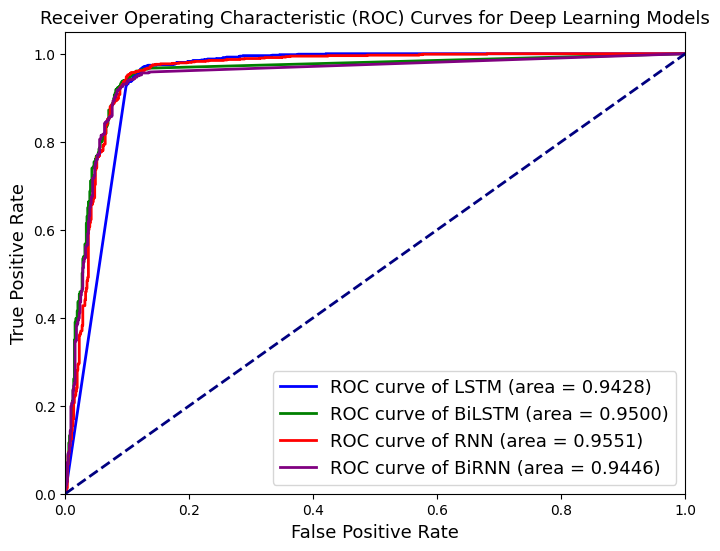

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Define the function to create models
def create_model(model_type, input_shape):
    if model_type == 'BiLSTM':
        model = Sequential([
            Bidirectional(LSTM(4, return_sequences=True), input_shape=input_shape),
            Dropout(0.5),
            Bidirectional(LSTM(2)),
            Dropout(0.5),
            Dense(2, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    elif model_type == 'LSTM':
        model = Sequential([
            LSTM(4, return_sequences=True, input_shape=input_shape),
            Dropout(0.5),
            LSTM(2, return_sequences=False),
            Dropout(0.5),
            Dense(2, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    elif model_type == 'RNN':
        model = Sequential([
            SimpleRNN(4, return_sequences=True, input_shape=input_shape),
            Dropout(0.5),
            SimpleRNN(2, return_sequences=False),
            Dropout(0.5),
            Dense(2, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    elif model_type == 'BiRNN':
        model = Sequential([
            Bidirectional(SimpleRNN(4, return_sequences=True), input_shape=input_shape),
            Dropout(0.5),
            Bidirectional(SimpleRNN(2, return_sequences=False)),
            Dropout(0.5),
            Dense(2, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    return model

# Assuming input_shape based on the final_train_df without the target column
input_shape = (1, final_train_df.shape[1] - 1)  # Only one timestep, features equal to number of columns minus target

# Initialize dictionary to store FPR, TPR, and AUC for each model
roc_data = {}
metrics_data = {}

# Define model types
model_types = ['LSTM', 'BiLSTM', 'RNN', 'BiRNN']

# Train and evaluate each model
for model_type in model_types:
    model = create_model(model_type, input_shape)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    y_train = final_train_df['Wildfire'].astype('float32').values
    y_val = final_val_df['Wildfire'].astype('float32').values
    y_test = final_test_df['Wildfire'].astype('float32').values

    X_train = final_train_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_train_df.shape[1] - 1)
    X_val = final_val_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_val_df.shape[1] - 1)
    X_test = final_test_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_test_df.shape[1] - 1)

    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))
    y_pred_probs = model.predict(X_test).ravel()

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    roc_data[model_type] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

    # Calculate metrics
    y_pred = (y_pred_probs >= 0.5).astype(int)  # Convert probabilities to binary predictions
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Sensitivity
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    metrics_data[model_type] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Sensitivity': recall,
        'Specificity': specificity,
        'F1 Score': f1
    }

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_data).transpose()

# Display the DataFrame in a research paper format
print(metrics_df)

# Optionally, save the DataFrame to a CSV file
metrics_df.to_csv('model_metrics.csv', index=True)

# Plot ROC curves
plt.figure(figsize=(8, 6))

for (model_type, color) in zip(roc_data.keys(), ['blue', 'green', 'red', 'purple']):
    plt.plot(roc_data[model_type]['fpr'], roc_data[model_type]['tpr'], color=color, lw=2,
             label=f'ROC curve of {model_type} (area = {roc_data[model_type]["auc"]:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('Receiver Operating Characteristic (ROC) Curves for Deep Learning Models', fontsize=13)
plt.legend(loc="lower right", fontsize=13)
plt.show()


# BWO-RNN

In [ ]:
def initialize_bwo_population(pop_size, param_bounds):
    population = []
    for _ in range(pop_size):
        spider = {
            'units': np.random.randint(param_bounds['units'][0], param_bounds['units'][1] + 1),
            'dropout': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1])
        }
        population.append(spider)
    return population


In [ ]:
def bwo_crossover_and_cannibalism(population):
    # This is a simplified version. You will need to adapt it based on actual BWO behavior.
    new_population = []
    for spider in population:
        if np.random.rand() < 0.5:  # Random chance to mate
            partner = np.random.choice(population)
            child = {
                'units': int((spider['units'] + partner['units']) / 2),
                'dropout': (spider['dropout'] + partner['dropout']) / 2
            }
            new_population.append(child)
        else:
            new_population.append(spider)
    return new_population


In [ ]:
def bwo_select_survivors(population, max_population_size):
    # Sort by fitness and select the top survivors
    sorted_population = sorted(population, key=lambda x: x['fitness'])
    return sorted_population[:max_population_size]


In [ ]:
def bwo_optimize_rnn(X_train, y_train, X_val, y_val):
    param_bounds = {'units': (10, 50), 'dropout': (0.1, 0.5)}
    population = initialize_bwo_population(10, param_bounds)
    max_generations = 20

    best_fitness = float('inf')
    best_params = None

    for generation in range(max_generations):
        for spider in population:
            params = {'units': spider['units'], 'dropout': spider['dropout']}
            model = create_rnn_model(params, X_train.shape[2])
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=20, verbose=0)
            loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
            spider['fitness'] = loss  # Lower loss is better

            if spider['fitness'] < best_fitness:
                best_fitness = spider['fitness']
                best_params = spider

        population = bwo_crossover_and_cannibalism(population)
        population = bwo_select_survivors(population, 10)

    return best_params


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming the following optimal parameters were found
optimal_params = {
    'units': 32,
    'dropout': 0.3
}

def create_optimized_rnn_model(params, input_feature_count):
    model = Sequential([
        SimpleRNN(params['units'], input_shape=(1, input_feature_count), return_sequences=True),
        Dropout(params['dropout']),
        SimpleRNN(params['units'], return_sequences=False),
        Dropout(params['dropout']),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Assuming input_shape based on your dataset
input_feature_count = X_train.shape[2]  # Assuming X_train is already appropriately shaped

# Create the model with optimal parameters
model = create_optimized_rnn_model(optimal_params, input_feature_count)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/20
263/263 [==============================] - 3s 5ms/step - loss: 0.3685 - accuracy: 0.8477 - val_loss: 0.2286 - val_accuracy: 0.9261
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 0.2570 - accuracy: 0.9077 - val_loss: 0.2181 - val_accuracy: 0.9267
Epoch 3/20
263/263 [==============================] - 1s 3ms/step - loss: 0.2429 - accuracy: 0.9138 - val_loss: 0.2118 - val_accuracy: 0.9283
Epoch 4/20
263/263 [==============================] - 1s 3ms/step - loss: 0.2373 - accuracy: 0.9139 - val_loss: 0.2107 - val_accuracy: 0.9272
Epoch 5/20
263/263 [==============================] - 1s 3ms/step - loss: 0.2289 - accuracy: 0.9183 - val_loss: 0.2018 - val_accuracy: 0.9289
Epoch 6/20
263/263 [==============================] - 1s 4ms/step - loss: 0.2268 - accuracy: 0.9160 - val_loss: 0.1990 - val_accuracy: 0.9333
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 0.2217 - accuracy: 0.9211 - val_loss: 0.1966 - val_accuracy: 0.9300
Epoch 

57/57 [==============================] - 0s 1ms/step


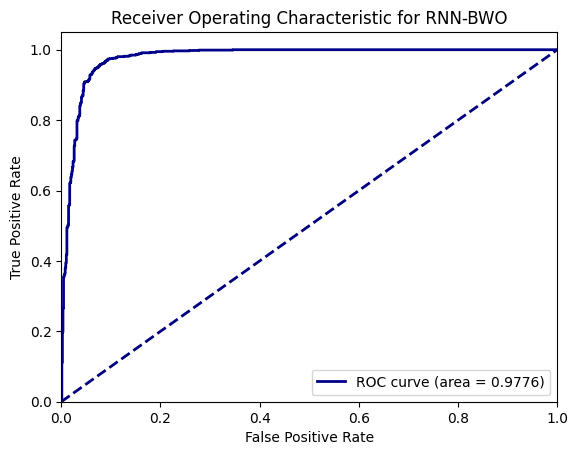

In [ ]:
# Predict probabilities for the test set
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN-BWO')
plt.legend(loc="lower right")
plt.show()


# BWO-BiRNN

Generation 1/10, Best Fitness: 0.14749082922935486
Generation 2/10, Best Fitness: 0.14749082922935486
Generation 3/10, Best Fitness: 0.14749082922935486
Generation 4/10, Best Fitness: 0.14749082922935486
Generation 5/10, Best Fitness: 0.14749082922935486
Generation 6/10, Best Fitness: 0.14749082922935486
Generation 7/10, Best Fitness: 0.14749082922935486
Generation 8/10, Best Fitness: 0.14749082922935486
Generation 9/10, Best Fitness: 0.14749082922935486
Generation 10/10, Best Fitness: 0.14749082922935486
Best Parameters: {'units': 49, 'dropout': 0.3937253807300095, 'fitness': 0.14749082922935486}
Epoch 1/30
263/263 [==============================] - 6s 7ms/step - loss: 0.3324 - accuracy: 0.8640 - val_loss: 0.2176 - val_accuracy: 0.9228
Epoch 2/30
263/263 [==============================] - 1s 4ms/step - loss: 0.2490 - accuracy: 0.9067 - val_loss: 0.2074 - val_accuracy: 0.9322
Epoch 3/30
263/263 [==============================] - 2s 6ms/step - loss: 0.2263 - accuracy: 0.9162 - val_loss:

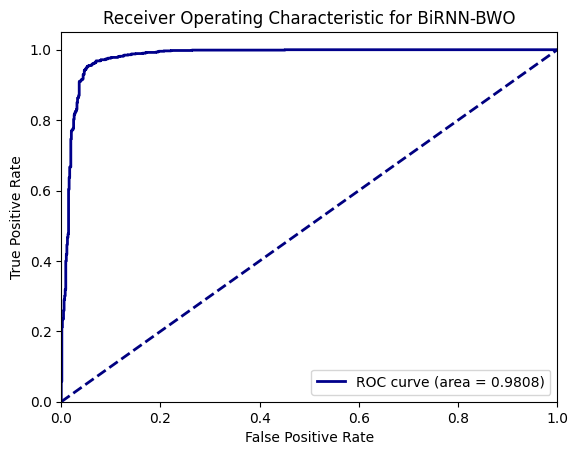

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the BiRNN model creation function
def create_birnn_model(params, input_feature_count):
    model = Sequential([
        Bidirectional(SimpleRNN(params['units'], return_sequences=True), input_shape=(1, input_feature_count)),
        Dropout(params['dropout']),
        Bidirectional(SimpleRNN(params['units'], return_sequences=False)),
        Dropout(params['dropout']),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Initialize BWO population
def initialize_bwo_population(pop_size, param_bounds):
    population = []
    for _ in range(pop_size):
        spider = {
            'units': np.random.randint(param_bounds['units'][0], param_bounds['units'][1] + 1),
            'dropout': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1]),
            'fitness': None  # Initialize fitness
        }
        population.append(spider)
    return population

# BWO Crossover and Cannibalism
def bwo_crossover_and_cannibalism(population):
    new_population = []
    for spider in population:
        if np.random.rand() < 0.5:  # Random chance to mate
            partner = np.random.choice(population)
            child = {
                'units': int((spider['units'] + partner['units']) / 2),
                'dropout': (spider['dropout'] + partner['dropout']) / 2,
                'fitness': None  # Reset fitness for new child
            }
            new_population.append(child)
        else:
            new_population.append(spider)
    return new_population

# Select survivors based on fitness
def bwo_select_survivors(population, max_population_size):
    # Ensure all spiders have a fitness value
    for spider in population:
        if spider['fitness'] is None:
            spider['fitness'] = float('inf')  # Assign worst fitness if not evaluated
    # Sort by fitness and select the top survivors
    sorted_population = sorted(population, key=lambda x: x['fitness'])
    return sorted_population[:max_population_size]

# Optimize BiRNN using BWO
def bwo_optimize_birnn(X_train, y_train, X_val, y_val):
    param_bounds = {'units': (10, 50), 'dropout': (0.1, 0.5)}
    population = initialize_bwo_population(10, param_bounds)
    max_generations = 10

    best_fitness = float('inf')
    best_params = None

    for generation in range(max_generations):
        for spider in population:
            params = {'units': spider['units'], 'dropout': spider['dropout']}
            model = create_birnn_model(params, X_train.shape[2])
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=30, verbose=0)  # Reduced verbosity for optimization
            loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
            spider['fitness'] = loss  # Lower loss is better

            if spider['fitness'] < best_fitness:
                best_fitness = spider['fitness']
                best_params = spider

        population = bwo_crossover_and_cannibalism(population)
        population = bwo_select_survivors(population, 10)
        print(f"Generation {generation+1}/{max_generations}, Best Fitness: {best_fitness}")

    return best_params

# Assuming X_train, X_val, y_train, y_val, X_test, and y_test are already defined
input_feature_count = X_train.shape[2]

# Optimize the BiRNN using BWO
best_params = bwo_optimize_birnn(X_train, y_train, X_val, y_val)
print(f"Best Parameters: {best_params}")

# Create the model with optimal parameters
model = create_birnn_model(best_params, input_feature_count)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for BiRNN-BWO')
plt.legend(loc="lower right")
plt.show()


# LSTM-BWO

Generation 1/5, Best Fitness: 0.1473095566034317
Generation 2/5, Best Fitness: 0.14568006992340088
Generation 3/5, Best Fitness: 0.14568006992340088
Generation 4/5, Best Fitness: 0.14296023547649384
Generation 5/5, Best Fitness: 0.14296023547649384
Best Parameters: {'units': 48, 'dropout': 0.2459363364465279, 'fitness': 0.1557602882385254}
Epoch 1/20
263/263 [==============================] - 6s 8ms/step - loss: 0.3666 - accuracy: 0.8529 - val_loss: 0.2204 - val_accuracy: 0.9250
Epoch 2/20
263/263 [==============================] - 2s 6ms/step - loss: 0.2246 - accuracy: 0.9194 - val_loss: 0.2079 - val_accuracy: 0.9311
Epoch 3/20
263/263 [==============================] - 2s 8ms/step - loss: 0.2083 - accuracy: 0.9250 - val_loss: 0.1962 - val_accuracy: 0.9300
Epoch 4/20
263/263 [==============================] - 1s 5ms/step - loss: 0.2014 - accuracy: 0.9274 - val_loss: 0.1857 - val_accuracy: 0.9361
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 0.1892 - accurac

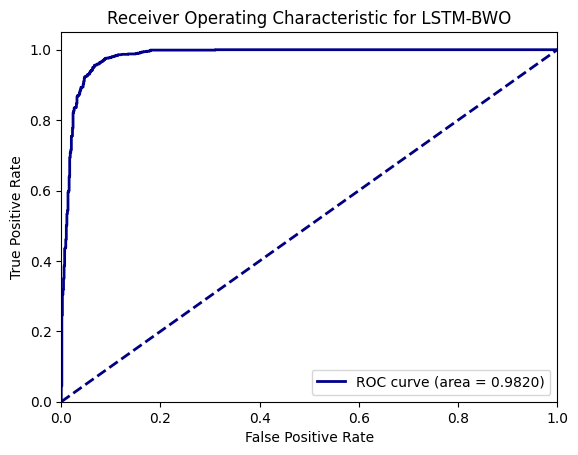

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the LSTM model creation function
def create_lstm_model(params, input_feature_count):
    model = Sequential([
        LSTM(params['units'], input_shape=(1, input_feature_count), return_sequences=True),
        Dropout(params['dropout']),
        LSTM(params['units'], return_sequences=False),
        Dropout(params['dropout']),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Initialize BWO population
def initialize_bwo_population(pop_size, param_bounds):
    population = []
    for _ in range(pop_size):
        spider = {
            'units': np.random.randint(param_bounds['units'][0], param_bounds['units'][1] + 1),
            'dropout': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1]),
            'fitness': None  # Initialize fitness
        }
        population.append(spider)
    return population

# BWO Crossover and Cannibalism
def bwo_crossover_and_cannibalism(population):
    new_population = []
    for spider in population:
        if np.random.rand() < 0.5:  # Random chance to mate
            partner = np.random.choice(population)
            child = {
                'units': int((spider['units'] + partner['units']) / 2),
                'dropout': (spider['dropout'] + partner['dropout']) / 2,
                'fitness': None  # Reset fitness for new child
            }
            new_population.append(child)
        else:
            new_population.append(spider)
    return new_population

# Select survivors based on fitness
def bwo_select_survivors(population, max_population_size):
    # Ensure all spiders have a fitness value
    for spider in population:
        if spider['fitness'] is None:
            spider['fitness'] = float('inf')  # Assign worst fitness if not evaluated
    # Sort by fitness and select the top survivors
    sorted_population = sorted(population, key=lambda x: x['fitness'])
    return sorted_population[:max_population_size]

# Optimize LSTM using BWO
def bwo_optimize_lstm(X_train, y_train, X_val, y_val):
    param_bounds = {'units': (10, 50), 'dropout': (0.1, 0.5)}
    population = initialize_bwo_population(5, param_bounds)
    max_generations = 5

    best_fitness = float('inf')
    best_params = None

    for generation in range(max_generations):
        for spider in population:
            params = {'units': spider['units'], 'dropout': spider['dropout']}
            model = create_lstm_model(params, X_train.shape[2])
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=20, verbose=0)  # Reduced verbosity for optimization
            loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
            spider['fitness'] = loss  # Lower loss is better

            if spider['fitness'] < best_fitness:
                best_fitness = spider['fitness']
                best_params = spider

        population = bwo_crossover_and_cannibalism(population)
        population = bwo_select_survivors(population, 5)
        print(f"Generation {generation+1}/{max_generations}, Best Fitness: {best_fitness}")

    return best_params

# Assuming X_train, X_val, y_train, y_val, X_test, and y_test are already defined
input_feature_count = X_train.shape[2]

# Optimize the LSTM using BWO
best_params = bwo_optimize_lstm(X_train, y_train, X_val, y_val)
print(f"Best Parameters: {best_params}")

# Create the model with optimal parameters
model = create_lstm_model(best_params, input_feature_count)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM-BWO')
plt.legend(loc="lower right")
plt.show()


# BiLSTM-BWO

Generation 1/5, Best Fitness: 0.1485844999551773
Generation 2/5, Best Fitness: 0.14762760698795319
Generation 3/5, Best Fitness: 0.14354169368743896
Generation 4/5, Best Fitness: 0.14354169368743896
Generation 5/5, Best Fitness: 0.14354169368743896
Best Parameters: {'units': 28, 'dropout': 0.3437975569675581, 'fitness': 0.14952996373176575}
Epoch 1/20
263/263 [==============================] - 11s 15ms/step - loss: 0.3480 - accuracy: 0.8781 - val_loss: 0.2129 - val_accuracy: 0.9289
Epoch 2/20
263/263 [==============================] - 2s 6ms/step - loss: 0.2260 - accuracy: 0.9182 - val_loss: 0.1991 - val_accuracy: 0.9339
Epoch 3/20
263/263 [==============================] - 2s 6ms/step - loss: 0.2122 - accuracy: 0.9230 - val_loss: 0.1867 - val_accuracy: 0.9344
Epoch 4/20
263/263 [==============================] - 2s 6ms/step - loss: 0.1994 - accuracy: 0.9275 - val_loss: 0.1825 - val_accuracy: 0.9350
Epoch 5/20
263/263 [==============================] - 2s 6ms/step - loss: 0.1942 - accu

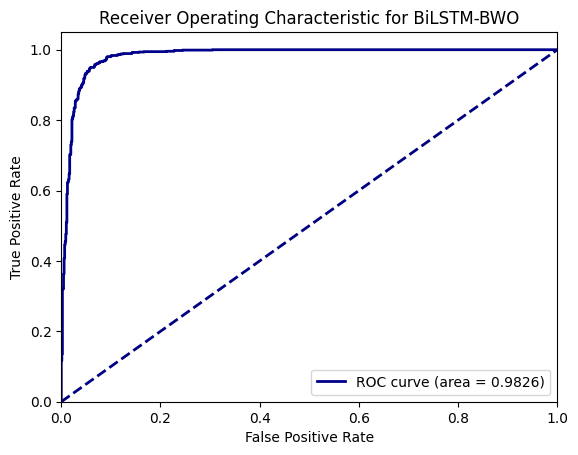

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the BiLSTM model creation function
def create_bilstm_model(params, input_feature_count):
    model = Sequential([
        Bidirectional(LSTM(params['units'], return_sequences=True), input_shape=(1, input_feature_count)),
        Dropout(params['dropout']),
        Bidirectional(LSTM(params['units'], return_sequences=False)),
        Dropout(params['dropout']),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Initialize BWO population
def initialize_bwo_population(pop_size, param_bounds):
    population = []
    for _ in range(pop_size):
        spider = {
            'units': np.random.randint(param_bounds['units'][0], param_bounds['units'][1] + 1),
            'dropout': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1]),
            'fitness': None  # Initialize fitness
        }
        population.append(spider)
    return population

# BWO Crossover and Cannibalism
def bwo_crossover_and_cannibalism(population):
    new_population = []
    for spider in population:
        if np.random.rand() < 0.5:  # Random chance to mate
            partner = np.random.choice(population)
            child = {
                'units': int((spider['units'] + partner['units']) / 2),
                'dropout': (spider['dropout'] + partner['dropout']) / 2,
                'fitness': None  # Reset fitness for new child
            }
            new_population.append(child)
        else:
            new_population.append(spider)
    return new_population

# Select survivors based on fitness
def bwo_select_survivors(population, max_population_size):
    # Ensure all spiders have a fitness value
    for spider in population:
        if spider['fitness'] is None:
            spider['fitness'] = float('inf')  # Assign worst fitness if not evaluated
    # Sort by fitness and select the top survivors
    sorted_population = sorted(population, key=lambda x: x['fitness'])
    return sorted_population[:max_population_size]

# Optimize BiLSTM using BWO
def bwo_optimize_bilstm(X_train, y_train, X_val, y_val):
    param_bounds = {'units': (10, 50), 'dropout': (0.1, 0.5)}
    population = initialize_bwo_population(5, param_bounds)
    max_generations = 5

    best_fitness = float('inf')
    best_params = None

    for generation in range(max_generations):
        for spider in population:
            params = {'units': spider['units'], 'dropout': spider['dropout']}
            model = create_bilstm_model(params, X_train.shape[2])
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=20, verbose=0)  # Reduced verbosity for optimization
            loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
            spider['fitness'] = loss  # Lower loss is better

            if spider['fitness'] < best_fitness:
                best_fitness = spider['fitness']
                best_params = spider

        population = bwo_crossover_and_cannibalism(population)
        population = bwo_select_survivors(population, 10)
        print(f"Generation {generation+1}/{max_generations}, Best Fitness: {best_fitness}")

    return best_params

# Assuming X_train, X_val, y_train, y_val, X_test, and y_test are already defined
input_feature_count = X_train.shape[2]

# Optimize the BiLSTM using BWO
best_params = bwo_optimize_bilstm(X_train, y_train, X_val, y_val)
print(f"Best Parameters: {best_params}")

# Create the model with optimal parameters
model = create_bilstm_model(best_params, input_feature_count)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for BiLSTM-BWO')
plt.legend(loc="lower right")
plt.show()


# CNN-BWO

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the CNN model creation function
def create_cnn_model(params, input_shape):
    model = Sequential([
        Conv1D(filters=params['filters1'], kernel_size=params['kernel_size1'], activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(params['dropout1']),
        Conv1D(filters=params['filters2'], kernel_size=params['kernel_size2'], activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(params['dropout2']),
        Flatten(),
        Dense(params['dense_units'], activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Initialize BWO population
def initialize_bwo_population(pop_size, param_bounds):
    population = []
    for _ in range(pop_size):
        spider = {
            'filters1': np.random.randint(param_bounds['filters'][0], param_bounds['filters'][1] + 1),
            'kernel_size1': np.random.randint(param_bounds['kernel_size'][0], param_bounds['kernel_size'][1] + 1),
            'dropout1': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1]),
            'filters2': np.random.randint(param_bounds['filters'][0], param_bounds['filters'][1] + 1),
            'kernel_size2': np.random.randint(param_bounds['kernel_size'][0], param_bounds['kernel_size'][1] + 1),
            'dropout2': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1]),
            'dense_units': np.random.randint(param_bounds['dense_units'][0], param_bounds['dense_units'][1] + 1),
            'fitness': None  # Initialize fitness
        }
        population.append(spider)
    return population

# BWO Crossover and Cannibalism
def bwo_crossover_and_cannibalism(population):
    new_population = []
    for spider in population:
        if np.random.rand() < 0.5:  # Random chance to mate
            partner = np.random.choice(population)
            child = {
                'filters1': int((spider['filters1'] + partner['filters1']) / 2),
                'kernel_size1': int((spider['kernel_size1'] + partner['kernel_size1']) / 2),
                'dropout1': (spider['dropout1'] + partner['dropout1']) / 2,
                'filters2': int((spider['filters2'] + partner['filters2']) / 2),
                'kernel_size2': int((spider['kernel_size2'] + partner['kernel_size2']) / 2),
                'dropout2': (spider['dropout2'] + partner['dropout2']) / 2,
                'dense_units': int((spider['dense_units'] + partner['dense_units']) / 2),
                'fitness': None  # Reset fitness for new child
            }
            new_population.append(child)
        else:
            new_population.append(spider)
    return new_population

# Select survivors based on fitness
def bwo_select_survivors(population, max_population_size):
    # Ensure all spiders have a fitness value
    for spider in population:
        if spider['fitness'] is None:
            spider['fitness'] = float('inf')  # Assign worst fitness if not evaluated
    # Sort by fitness and select the top survivors
    sorted_population = sorted(population, key=lambda x: x['fitness'])
    return sorted_population[:max_population_size]

# Optimize CNN using BWO
def bwo_optimize_cnn(X_train, y_train, X_val, y_val):
    param_bounds = {
        'filters': (16, 64),
        'kernel_size': (2, 5),
        'dropout': (0.1, 0.5),
        'dense_units': (8, 64)
    }
    population = initialize_bwo_population(10, param_bounds)
    max_generations = 5

    best_fitness = float('inf')
    best_params = None

    for generation in range(max_generations):
        for spider in population:
            params = {
                'filters1': spider['filters1'],
                'kernel_size1': spider['kernel_size1'],
                'dropout1': spider['dropout1'],
                'filters2': spider['filters2'],
                'kernel_size2': spider['kernel_size2'],
                'dropout2': spider['dropout2'],
                'dense_units': spider['dense_units']
            }
            model = create_cnn_model(params, X_train.shape[1:])
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=20, verbose=0)  # Reduced verbosity for optimization
            loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
            spider['fitness'] = loss  # Lower loss is better

            if spider['fitness'] < best_fitness:
                best_fitness = spider['fitness']
                best_params = spider

        population = bwo_crossover_and_cannibalism(population)
        population = bwo_select_survivors(population, 10)
        print(f"Generation {generation+1}/{max_generations}, Best Fitness: {best_fitness}")

    return best_params

# Assuming input_shape based on your dataset
input_shape = (final_train_df.shape[1] - 1, 1)  # Exclude the target variable 'Wildfire'

# Prepare data
# Convert categorical target data to numpy arrays
y_train = np.array(final_train_df['Wildfire']).astype('float32')
y_val = np.array(final_val_df['Wildfire']).astype('float32')
y_test = np.array(final_test_df['Wildfire']).astype('float32')

# Reshape input data for CNN input
X_train = final_train_df.drop('Wildfire', axis=1).values.reshape(-1, input_shape[0], 1)
X_val = final_val_df.drop('Wildfire', axis=1).values.reshape(-1, input_shape[0], 1)
X_test = final_test_df.drop('Wildfire', axis=1).values.reshape(-1, input_shape[0], 1)

# Optimize the CNN using BWO
best_params = bwo_optimize_cnn(X_train, y_train, X_val, y_val)
print(f"Best Parameters: {best_params}")

# Create the model with optimal parameters
model = create_cnn_model(best_params, input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities for ROC curve
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic CNN-BWO')
plt.legend(loc="lower right")
plt.show()


KeyboardInterrupt: 

# ANN-BWO

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the ANN model creation function
def create_ann_model(params, input_dim):
    model = Sequential([
        Dense(params['units'], input_dim=input_dim, activation='relu'),
        Dropout(params['dropout']),
        Dense(params['units'], activation='relu'),
        Dropout(params['dropout']),
        Dense(1, activation='sigmoid')
    ])
    return model

# Initialize BWO population
def initialize_bwo_population(pop_size, param_bounds):
    population = []
    for _ in range(pop_size):
        spider = {
            'units': np.random.randint(param_bounds['units'][0], param_bounds['units'][1] + 1),
            'dropout': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1]),
            'fitness': None  # Initialize fitness
        }
        population.append(spider)
    return population

# BWO Crossover and Cannibalism
def bwo_crossover_and_cannibalism(population):
    new_population = []
    for spider in population:
        if np.random.rand() < 0.5:  # Random chance to mate
            partner = np.random.choice(population)
            child = {
                'units': int((spider['units'] + partner['units']) / 2),
                'dropout': (spider['dropout'] + partner['dropout']) / 2,
                'fitness': None  # Reset fitness for new child
            }
            new_population.append(child)
        else:
            new_population.append(spider)
    return new_population

# Select survivors based on fitness
def bwo_select_survivors(population, max_population_size):
    # Ensure all spiders have a fitness value
    for spider in population:
        if spider['fitness'] is None:
            spider['fitness'] = float('inf')  # Assign worst fitness if not evaluated
    # Sort by fitness and select the top survivors
    sorted_population = sorted(population, key=lambda x: x['fitness'])
    return sorted_population[:max_population_size]

# Optimize ANN using BWO
def bwo_optimize_ann(X_train, y_train, X_val, y_val):
    param_bounds = {'units': (10, 100), 'dropout': (0.1, 0.5)}
    population = initialize_bwo_population(5, param_bounds)
    max_generations = 5

    best_fitness = float('inf')
    best_params = None

    for generation in range(max_generations):
        for spider in population:
            params = {'units': spider['units'], 'dropout': spider['dropout']}
            model = create_ann_model(params, X_train.shape[1])
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=30, verbose=0)  # Reduced verbosity for optimization
            loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
            spider['fitness'] = loss  # Lower loss is better

            if spider['fitness'] < best_fitness:
                best_fitness = spider['fitness']
                best_params = spider

        population = bwo_crossover_and_cannibalism(population)
        population = bwo_select_survivors(population, 5)
        print(f"Generation {generation+1}/{max_generations}, Best Fitness: {best_fitness}")

    return best_params

# Assuming X_train, X_val, y_train, y_val, X_test, and y_test are already defined
input_dim = X_train.shape[1]

# Optimize the ANN using BWO
best_params = bwo_optimize_ann(X_train, y_train, X_val, y_val)
print(f"Best Parameters: {best_params}")

# Create the model with optimal parameters
model = create_ann_model(best_params, input_dim)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for ANN-BWO')
plt.legend(loc="lower right")
plt.show()


To combine all the ROC curve plotting into a single code cell, we'll organize the code to handle each model, compute its ROC curve, and then plot them side by side. Below is the consolidated code:

Generation 1/5, Best Fitness: 0.14930255711078644
Generation 2/5, Best Fitness: 0.14930255711078644
Generation 3/5, Best Fitness: 0.14821910858154297
Generation 4/5, Best Fitness: 0.1449136734008789
Generation 5/5, Best Fitness: 0.1449136734008789
Epoch 1/20
263/263 [==============================] - 7s 9ms/step - loss: 0.4008 - accuracy: 0.8480 - val_loss: 0.2218 - val_accuracy: 0.9244
Epoch 2/20
263/263 [==============================] - 2s 8ms/step - loss: 0.2398 - accuracy: 0.9146 - val_loss: 0.2092 - val_accuracy: 0.9289
Epoch 3/20
263/263 [==============================] - 2s 7ms/step - loss: 0.2251 - accuracy: 0.9192 - val_loss: 0.2036 - val_accuracy: 0.9300
Epoch 4/20
263/263 [==============================] - 2s 6ms/step - loss: 0.2137 - accuracy: 0.9227 - val_loss: 0.2001 - val_accuracy: 0.9278
Epoch 5/20
263/263 [==============================] - 2s 6ms/step - loss: 0.2085 - accuracy: 0.9231 - val_loss: 0.1965 - val_accuracy: 0.9289
Epoch 6/20
263/263 [======================

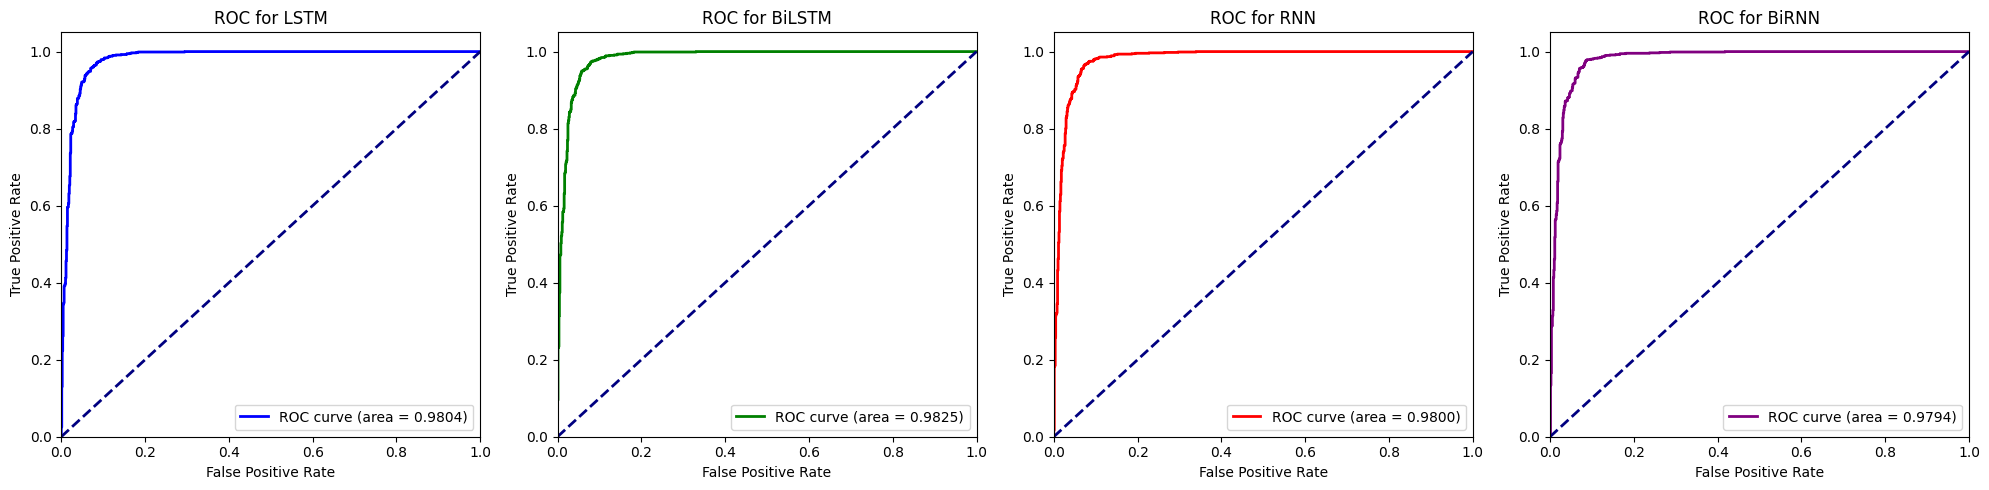

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the function to create models
def create_model(model_type, params, input_feature_count):
    if model_type == 'BiLSTM':
        model = Sequential([
            Bidirectional(LSTM(params['units'], return_sequences=True), input_shape=(1, input_feature_count)),
            Dropout(params['dropout']),
            Bidirectional(LSTM(params['units'], return_sequences=False)),
            Dropout(params['dropout']),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    elif model_type == 'LSTM':
        model = Sequential([
            LSTM(params['units'], return_sequences=True, input_shape=(1, input_feature_count)),
            Dropout(params['dropout']),
            LSTM(params['units'], return_sequences=False),
            Dropout(params['dropout']),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    elif model_type == 'RNN':
        model = Sequential([
            SimpleRNN(params['units'], return_sequences=True, input_shape=(1, input_feature_count)),
            Dropout(params['dropout']),
            SimpleRNN(params['units'], return_sequences=False),
            Dropout(params['dropout']),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    elif model_type == 'BiRNN':
        model = Sequential([
            Bidirectional(SimpleRNN(params['units'], return_sequences=True), input_shape=(1, input_feature_count)),
            Dropout(params['dropout']),
            Bidirectional(SimpleRNN(params['units'], return_sequences=False)),
            Dropout(params['dropout']),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    return model

# Function to initialize BWO population
def initialize_bwo_population(pop_size, param_bounds):
    population = []
    for _ in range(pop_size):
        spider = {
            'units': np.random.randint(param_bounds['units'][0], param_bounds['units'][1] + 1),
            'dropout': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1]),
            'fitness': None  # Initialize fitness
        }
        population.append(spider)
    return population

# BWO Crossover and Cannibalism
def bwo_crossover_and_cannibalism(population):
    new_population = []
    for spider in population:
        if np.random.rand() < 0.5:  # Random chance to mate
            partner = np.random.choice(population)
            child = {
                'units': int((spider['units'] + partner['units']) / 2),
                'dropout': (spider['dropout'] + partner['dropout']) / 2,
                'fitness': None  # Reset fitness for new child
            }
            new_population.append(child)
        else:
            new_population.append(spider)
    return new_population

# Select survivors based on fitness
def bwo_select_survivors(population, max_population_size):
    # Ensure all spiders have a fitness value
    for spider in population:
        if spider['fitness'] is None:
            spider['fitness'] = float('inf')  # Assign worst fitness if not evaluated
    # Sort by fitness and select the top survivors
    sorted_population = sorted(population, key=lambda x: x['fitness'])
    return sorted_population[:max_population_size]

# Optimize model using BWO
def bwo_optimize(model_type, X_train, y_train, X_val, y_val, input_feature_count):
    param_bounds = {'units': (5, 50), 'dropout': (0.1, 0.5)}
    population = initialize_bwo_population(5, param_bounds)
    max_generations = 5

    best_fitness = float('inf')
    best_params = None

    for generation in range(max_generations):
        for spider in population:
            params = {'units': spider['units'], 'dropout': spider['dropout']}
            model = create_model(model_type, params, input_feature_count)
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=20, verbose=0)  # Reduced verbosity for optimization
            loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
            spider['fitness'] = loss  # Lower loss is better

            if spider['fitness'] < best_fitness:
                best_fitness = spider['fitness']
                best_params = spider

        population = bwo_crossover_and_cannibalism(population)
        population = bwo_select_survivors(population, 10)
        print(f"Generation {generation+1}/{max_generations}, Best Fitness: {best_fitness}")

    return best_params

# Assuming X_train, X_val, y_train, y_val, X_test, and y_test are already defined
input_feature_count = X_train.shape[2]

# Define model types
model_types = ['LSTM', 'BiLSTM', 'RNN', 'BiRNN']

# Initialize dictionary to store FPR, TPR, and AUC for each model
roc_data = {}

# Optimize and evaluate each model
for model_type in model_types:
    best_params = bwo_optimize(model_type, X_train, y_train, X_val, y_val, input_feature_count)
    model = create_model(model_type, best_params, input_feature_count)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")

    # Predict probabilities for the test set
    y_pred_probs = model.predict(X_test).ravel()

    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    roc_data[model_type] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

# Colors for different models
colors = ['blue', 'green', 'red', 'purple']

# Plot ROC curves side by side
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.ravel()

for idx, (model_name, data) in enumerate(roc_data.items()):
    axes[idx].plot(data['fpr'], data['tpr'], color=colors[idx], lw=2, label=f'ROC curve (area = {data["auc"]:.4f})')
    axes[idx].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[idx].set_xlim([0.0, 1.0])
    axes[idx].set_ylim([0.0, 1.05])
    axes[idx].set_xlabel('False Positive Rate')
    axes[idx].set_ylabel('True Positive Rate')
    axes[idx].set_title(f'ROC for {model_name}')
    axes[idx].legend(loc="lower right")

plt.tight_layout()
plt.show()


Generation 1/5, Best Fitness: 0.14886921644210815
Generation 2/5, Best Fitness: 0.14402012526988983
Generation 3/5, Best Fitness: 0.14402012526988983
Generation 4/5, Best Fitness: 0.14402012526988983
Generation 5/5, Best Fitness: 0.14402012526988983
Epoch 1/20
263/263 [==============================] - 7s 10ms/step - loss: 0.3576 - accuracy: 0.8713 - val_loss: 0.2167 - val_accuracy: 0.9267
Epoch 2/20
263/263 [==============================] - 1s 6ms/step - loss: 0.2274 - accuracy: 0.9174 - val_loss: 0.2047 - val_accuracy: 0.9311
Epoch 3/20
263/263 [==============================] - 2s 8ms/step - loss: 0.2159 - accuracy: 0.9230 - val_loss: 0.1965 - val_accuracy: 0.9328
Epoch 4/20
263/263 [==============================] - 2s 7ms/step - loss: 0.2023 - accuracy: 0.9261 - val_loss: 0.1903 - val_accuracy: 0.9311
Epoch 5/20
263/263 [==============================] - 2s 6ms/step - loss: 0.1947 - accuracy: 0.9277 - val_loss: 0.1858 - val_accuracy: 0.9339
Epoch 6/20
263/263 [===================

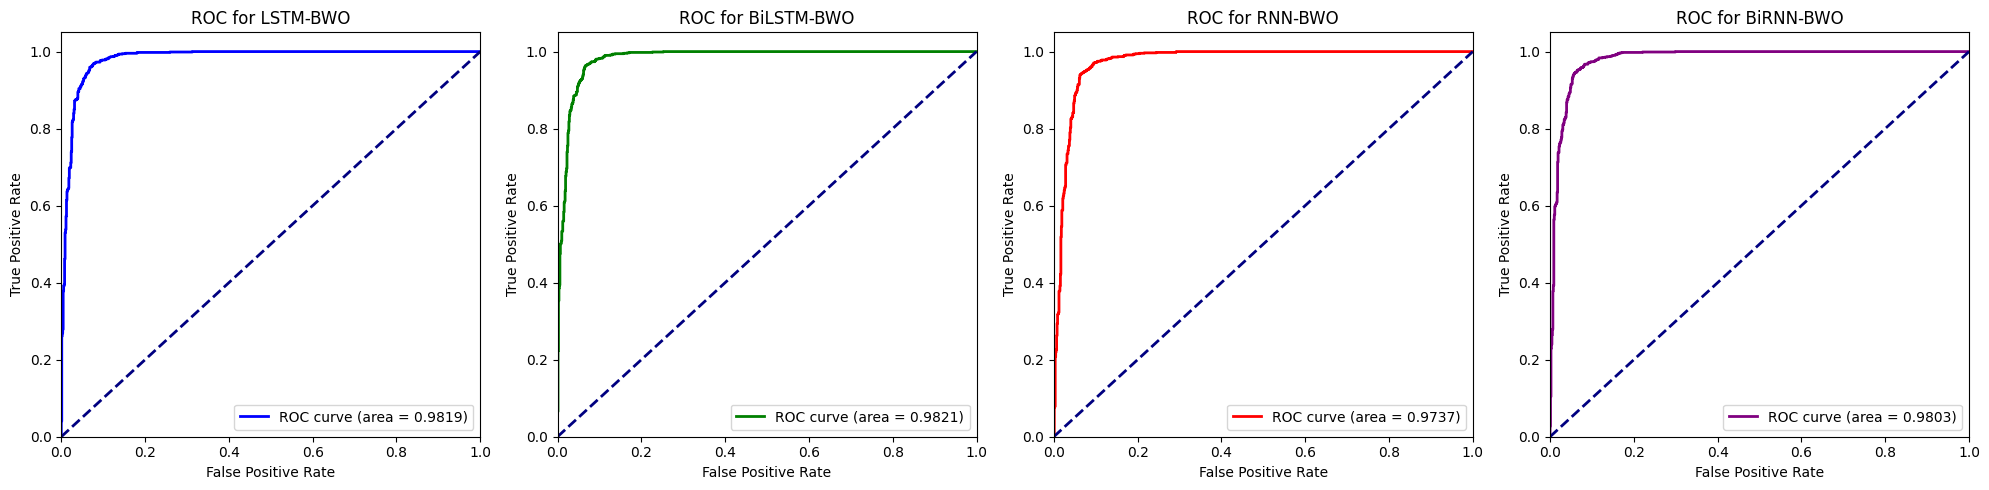

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the function to create models
def create_model(model_type, params, input_feature_count):
    if model_type == 'BiLSTM':
        model = Sequential([
            Bidirectional(LSTM(params['units'], return_sequences=True), input_shape=(1, input_feature_count)),
            Dropout(params['dropout']),
            Bidirectional(LSTM(params['units'], return_sequences=False)),
            Dropout(params['dropout']),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    elif model_type == 'LSTM':
        model = Sequential([
            LSTM(params['units'], return_sequences=True, input_shape=(1, input_feature_count)),
            Dropout(params['dropout']),
            LSTM(params['units'], return_sequences=False),
            Dropout(params['dropout']),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    elif model_type == 'RNN':
        model = Sequential([
            SimpleRNN(params['units'], return_sequences=True, input_shape=(1, input_feature_count)),
            Dropout(params['dropout']),
            SimpleRNN(params['units'], return_sequences=False),
            Dropout(params['dropout']),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    elif model_type == 'BiRNN':
        model = Sequential([
            Bidirectional(SimpleRNN(params['units'], return_sequences=True), input_shape=(1, input_feature_count)),
            Dropout(params['dropout']),
            Bidirectional(SimpleRNN(params['units'], return_sequences=False)),
            Dropout(params['dropout']),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    return model

# Function to initialize BWO population
def initialize_bwo_population(pop_size, param_bounds):
    population = []
    for _ in range(pop_size):
        spider = {
            'units': np.random.randint(param_bounds['units'][0], param_bounds['units'][1] + 1),
            'dropout': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1]),
            'fitness': None  # Initialize fitness
        }
        population.append(spider)
    return population

# BWO Crossover and Cannibalism
def bwo_crossover_and_cannibalism(population):
    new_population = []
    for spider in population:
        if np.random.rand() < 0.5:  # Random chance to mate
            partner = np.random.choice(population)
            child = {
                'units': int((spider['units'] + partner['units']) / 2),
                'dropout': (spider['dropout'] + partner['dropout']) / 2,
                'fitness': None  # Reset fitness for new child
            }
            new_population.append(child)
        else:
            new_population.append(spider)
    return new_population

# Select survivors based on fitness
def bwo_select_survivors(population, max_population_size):
    # Ensure all spiders have a fitness value
    for spider in population:
        if spider['fitness'] is None:
            spider['fitness'] = float('inf')  # Assign worst fitness if not evaluated
    # Sort by fitness and select the top survivors
    sorted_population = sorted(population, key=lambda x: x['fitness'])
    return sorted_population[:max_population_size]

# Optimize model using BWO
def bwo_optimize(model_type, X_train, y_train, X_val, y_val, input_feature_count):
    param_bounds = {'units': (5, 50), 'dropout': (0.1, 0.5)}
    population = initialize_bwo_population(5, param_bounds)
    max_generations = 5

    best_fitness = float('inf')
    best_params = None

    for generation in range(max_generations):
        for spider in population:
            params = {'units': spider['units'], 'dropout': spider['dropout']}
            model = create_model(model_type, params, input_feature_count)
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=20, verbose=0)  # Reduced verbosity for optimization
            loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
            spider['fitness'] = loss  # Lower loss is better

            if spider['fitness'] < best_fitness:
                best_fitness = spider['fitness']
                best_params = spider

        population = bwo_crossover_and_cannibalism(population)
        population = bwo_select_survivors(population, 10)
        print(f"Generation {generation+1}/{max_generations}, Best Fitness: {best_fitness}")

    return best_params

# Assuming X_train, X_val, y_train, y_val, X_test, and y_test are already defined
input_feature_count = X_train.shape[2]

# Define model types
model_types = ['LSTM', 'BiLSTM', 'RNN', 'BiRNN']

# Initialize dictionary to store FPR, TPR, and AUC for each model
roc_data = {}

# Optimize and evaluate each model
for model_type in model_types:
    best_params = bwo_optimize(model_type, X_train, y_train, X_val, y_val, input_feature_count)
    model = create_model(model_type, best_params, input_feature_count)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")

    # Predict probabilities for the test set
    y_pred_probs = model.predict(X_test).ravel()

    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    roc_data[model_type] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

# Colors for different models
colors = ['blue', 'green', 'red', 'purple']

# Plot ROC curves side by side
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.ravel()

for idx, (model_name, data) in enumerate(roc_data.items()):
    axes[idx].plot(data['fpr'], data['tpr'], color=colors[idx], lw=2, label=f'ROC curve (area = {data["auc"]:.4f})')
    axes[idx].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[idx].set_xlim([0.0, 1.0])
    axes[idx].set_ylim([0.0, 1.05])
    axes[idx].set_xlabel('False Positive Rate')
    axes[idx].set_ylabel('True Positive Rate')
    axes[idx].set_title(f'ROC for {model_name}-BWO')
    axes[idx].legend(loc="lower right")

plt.tight_layout()
plt.show()


# Complete code for Deep learning and metaheuristic algorithm

Generation 1/3, Best Fitness: 0.1483641266822815
Generation 2/3, Best Fitness: 0.1483641266822815
Generation 3/3, Best Fitness: 0.14655059576034546
Epoch 1/20
263/263 [==============================] - 8s 11ms/step - loss: 0.4162 - accuracy: 0.8524 - val_loss: 0.2279 - val_accuracy: 0.9261
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 0.2332 - accuracy: 0.9193 - val_loss: 0.2103 - val_accuracy: 0.9278
Epoch 3/20
263/263 [==============================] - 1s 5ms/step - loss: 0.2208 - accuracy: 0.9211 - val_loss: 0.2017 - val_accuracy: 0.9306
Epoch 4/20
263/263 [==============================] - 1s 5ms/step - loss: 0.2095 - accuracy: 0.9257 - val_loss: 0.1929 - val_accuracy: 0.9339
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 0.2028 - accuracy: 0.9270 - val_loss: 0.1891 - val_accuracy: 0.9339
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 0.1939 - accuracy: 0.9299 - val_loss: 0.1825 - val_accuracy: 0.9350

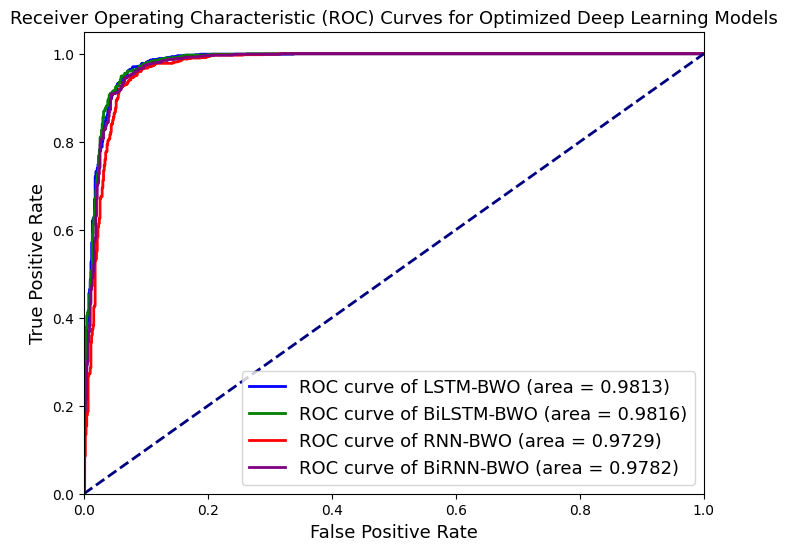

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Define the function to create models
def create_model(model_type, params, input_feature_count):
    if model_type == 'BiLSTM':
        model = Sequential([
            Bidirectional(LSTM(params['units'], return_sequences=True), input_shape=(1, input_feature_count)),
            Dropout(params['dropout']),
            Bidirectional(LSTM(params['units'], return_sequences=False)),
            Dropout(params['dropout']),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    elif model_type == 'LSTM':
        model = Sequential([
            LSTM(params['units'], return_sequences=True, input_shape=(1, input_feature_count)),
            Dropout(params['dropout']),
            LSTM(params['units'], return_sequences=False),
            Dropout(params['dropout']),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    elif model_type == 'RNN':
        model = Sequential([
            SimpleRNN(params['units'], return_sequences=True, input_shape=(1, input_feature_count)),
            Dropout(params['dropout']),
            SimpleRNN(params['units'], return_sequences=False),
            Dropout(params['dropout']),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    elif model_type == 'BiRNN':
        model = Sequential([
            Bidirectional(SimpleRNN(params['units'], return_sequences=True), input_shape=(1, input_feature_count)),
            Dropout(params['dropout']),
            Bidirectional(SimpleRNN(params['units'], return_sequences=False)),
            Dropout(params['dropout']),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    return model

# Function to initialize BWO population
def initialize_bwo_population(pop_size, param_bounds):
    population = []
    for _ in range(pop_size):
        spider = {
            'units': np.random.randint(param_bounds['units'][0], param_bounds['units'][1] + 1),
            'dropout': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1]),
            'fitness': None  # Initialize fitness
        }
        population.append(spider)
    return population

# BWO Crossover and Cannibalism
def bwo_crossover_and_cannibalism(population):
    new_population = []
    for spider in population:
        if np.random.rand() < 0.5:  # Random chance to mate
            partner = np.random.choice(population)
            child = {
                'units': int((spider['units'] + partner['units']) / 2),
                'dropout': (spider['dropout'] + partner['dropout']) / 2,
                'fitness': None  # Reset fitness for new child
            }
            new_population.append(child)
        else:
            new_population.append(spider)
    return new_population

# Select survivors based on fitness
def bwo_select_survivors(population, max_population_size):
    # Ensure all spiders have a fitness value
    for spider in population:
        if spider['fitness'] is None:
            spider['fitness'] = float('inf')  # Assign worst fitness if not evaluated
    # Sort by fitness and select the top survivors
    sorted_population = sorted(population, key=lambda x: x['fitness'])
    return sorted_population[:max_population_size]

# Optimize model using BWO
def bwo_optimize(model_type, X_train, y_train, X_val, y_val, input_feature_count):
    param_bounds = {'units': (3, 50), 'dropout': (0.1, 0.5)}
    population = initialize_bwo_population(3, param_bounds)
    max_generations = 3

    best_fitness = float('inf')
    best_params = None

    for generation in range(max_generations):
        for spider in population:
            params = {'units': spider['units'], 'dropout': spider['dropout']}
            model = create_model(model_type, params, input_feature_count)
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=20, verbose=0)  # Reduced verbosity for optimization
            loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
            spider['fitness'] = loss  # Lower loss is better

            if spider['fitness'] < best_fitness:
                best_fitness = spider['fitness']
                best_params = spider

        population = bwo_crossover_and_cannibalism(population)
        population = bwo_select_survivors(population, 3)
        print(f"Generation {generation+1}/{max_generations}, Best Fitness: {best_fitness}")

    return best_params

# Assuming X_train, X_val, y_train, y_val, X_test, and y_test are already defined
input_feature_count = X_train.shape[2]

# Define model types
model_types = ['LSTM', 'BiLSTM', 'RNN', 'BiRNN']

# Initialize dictionary to store FPR, TPR, and AUC for each model
roc_data = {}
metrics_data = {}

# Optimize and evaluate each model
for model_type in model_types:
    best_params = bwo_optimize(model_type, X_train, y_train, X_val, y_val, input_feature_count)
    model = create_model(model_type, best_params, input_feature_count)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")

    # Predict probabilities for the test set
    y_pred_probs = model.predict(X_test).ravel()

    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    roc_data[model_type] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

    # Calculate metrics
    y_pred = (y_pred_probs >= 0.5).astype(int)  # Convert probabilities to binary predictions
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Sensitivity
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    metrics_data[model_type] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Sensitivity': recall,
        'Specificity': specificity,
        'F1 Score': f1
    }

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_data).transpose()

# Display the DataFrame in a research paper format
print(metrics_df)

# Optionally, save the DataFrame to a CSV file
metrics_df.to_csv('optimized_model_metrics.csv', index=True)

# Plot ROC curves
plt.figure(figsize=(8, 6))

for (model_type, color) in zip(roc_data.keys(), ['blue', 'green', 'red', 'purple']):
    plt.plot(roc_data[model_type]['fpr'], roc_data[model_type]['tpr'], color=color, lw=2,
             label=f'ROC curve of {model_type}-BWO (area = {roc_data[model_type]["auc"]:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('Receiver Operating Characteristic (ROC) Curves for Optimized Deep Learning Models', fontsize=13)
plt.legend(loc="lower right", fontsize=13)
plt.show()
